In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install xgboost
!pip install shap

In [2]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score

from xgboost import XGBRegressor, plot_importance
import shap

import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
pd.set_option('display.max_columns', 500)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [3]:
shap.initjs()

In [4]:
# reading data
data = pd.read_csv('AnalystDataset.csv')
data

player_id Hand  Height  Weight   FB_velo      Var_1      Var_2  \
0          476    R      79     230  86.21085  60.661279  59.391315   
1          485    R      74     200  89.10082  60.532859  59.588370   
2          657    R      77     235  93.67752  63.277930  62.691639   
3          852    R      77     265  93.80372  64.384753  61.548699   
4          857    R      73     175  88.84100  59.727385  58.312190   
..         ...  ...     ...     ...       ...        ...        ...   
706      35725    R      77     200  97.61961  62.677690  61.397333   
707      34789    L      75     220  91.23993  56.633568  56.157263   
708      33916    R      73     235  96.20190  60.407482  60.332543   
709      34957    R      75     205  93.85143  63.730967  62.688136   
710      37684    R      77     235  94.07224  65.492890  64.773679   

         Var_3      Var_4      Var_5      Var_6      Var_7      Var_8  \
0    44.422491  43.642518  22.716024  22.590960  22.236456  12.327304   
1    44.093603  43.138550  22.265586  22.188746  23.716656   9.967643   
2    46.183158  43.016563  22.423662  22.126386  23.620238  14.384795   
3    44.031734  42.341505  22.975831  22.829567  33.064254  21.894375   
4    44.909837  43.210842  22.346657  22.025724  26.093312  17.333614   
..         ...        ...        ...        ...        ...        ...   
706  44.325992  41.460470  21.286737  20.864918  22.772110  20.127974   
707  43.100740  39.153122  21.886098  21.395411  31.363502  25.236191   
708  39.925645  38.120261  23.634326  23.510942  29.626509  18.325843   
709  42.763202  39.747561  21.536934  21.463548  27.558846  15.413398   
710  42.733603  40.987309  22.513908  22.410226  22.384936  13.959061   

           Var_9      Var_10       Var_11      Var_12      Var_13      Var_14  \
0     500.520230  421.789810  -778.166373 -316.852073  330.576478  242.101478   
1     382.629623  501.740917  -732.685727 -450.382537  600.634241  170.216665   
2    1116.114554  671.092037  -755.593680 -431.686486  516.719975  385.937831   
3     327.937146  652.976252  -587.649594 -495.129515  322.399031  277.033021   
4     445.086631  567.659515 -1284.643357 -434.850912  525.317227  292.672498   
..           ...         ...          ...         ...         ...         ...   
706   640.528777  439.429268  -656.770352 -372.308079  420.679056  301.594912   
707   422.635477  713.177748  -968.783489 -423.591983  214.454371  360.657791   
708   348.082748  437.391608 -1481.120820 -449.302432  557.141651  442.675461   
709   860.296851  702.814765  -593.367928 -546.438736  143.204152  237.517664   
710   895.787889  434.727730 -1082.765899 -369.806819  260.027994  243.347608   

       Var_15      Var_16      Var_17       Var_18      Var_19       Var_20  \
0    1.751398  147.572605  645.511408   945.267424  460.532827  1035.797349   
1    1.870317  153.947395  790.083204   922.545907  497.262721   710.962326   
2    1.942941  148.080692  674.896199   961.981259  565.612357  2849.914270   
3    1.639329  203.184731  695.623828   918.721471  546.525294  1429.279926   
4    1.851527  184.752913  779.509388  1013.959646  548.293787   285.238075   
..        ...         ...         ...          ...         ...          ...   
706  1.670883  145.415282  598.056882   939.957609  447.002282   532.843529   
707  1.472307  200.866593  830.793787  1005.431525  498.129113   555.758166   
708  1.413667  198.480995  511.511214   771.819947  411.158831  1017.325717   
709  1.629681  269.987996  716.971465   999.527420  555.027915  3366.293260   
710  1.449437  291.394536  526.789294  1051.673901  294.555736  1897.949235   

          Var_21      Var_22     Var_23     Var_24     Var_25     Var_26  \
0    2074.785645  162.279126  14.846736  42.376543  36.004777  -0.888073   
1    2125.575459  165.606510  18.534143  36.071675  24.822515   2.941229   
2    2024.187521  162.470144  14.553338  41.955436  34.329361  -3.429299   
3    1845.286205  172.258643  13.951789  44.76697

In [5]:
print(data.corr().loc['Var_214','FB_velo'])
print(data.corr().loc['Var_215','FB_velo'])
print(data.corr().loc['Var_216','FB_velo'])

-0.08352305830478732
-0.035556926736419005
0.0793406798413183


#### Note
- Var_214, Var_215, Var_216 have 26 NaN values, as they were also not highly correlated with velocity
- Unique pitchers
- Majority right-handed pitchers (don't think metrics are evened out for handedness)

#### Dropping columns with NaN values

In [6]:
data.isna().sum()[data.isna().sum().values>0].index

Index(['Var_214', 'Var_215', 'Var_216'], dtype='object')

In [7]:
data = data.dropna(axis=1)

In [8]:
# Unique pitcher rows
data['player_id'].value_counts()

476      1
21652    1
14753    1
17259    1
16005    1
        ..
9121     1
5732     1
5651     1
11480    1
37684    1
Name: player_id, Length: 711, dtype: int64

#### One-Hot Encoding Handedness

In [9]:
data['Hand'].value_counts()

R    515
L    196
Name: Hand, dtype: int64

In [10]:
data['one_hot_hand'] = pd.get_dummies(data['Hand'],drop_first=True,dtype=np.int64)
data = data.drop(columns='Hand')
data['one_hot_hand'].value_counts()

1    515
0    196
Name: one_hot_hand, dtype: int64

In [11]:
data[data['one_hot_hand']==1.0]['FB_velo'].describe()

count    515.000000
mean      93.645265
std        2.318508
min       82.114120
25%       92.396685
50%       93.780260
75%       95.067605
max      101.170400
Name: FB_velo, dtype: float64

In [12]:
data[data['one_hot_hand']==0.0]['FB_velo'].describe()

count    196.000000
mean      91.952105
std        2.442655
min       86.106330
25%       90.226385
50%       92.012890
75%       93.740420
max       98.948690
Name: FB_velo, dtype: float64

In [13]:
data.describe()

player_id      Height      Weight     FB_velo       Var_1  \
count    711.000000  711.000000  711.000000  711.000000  711.000000   
mean   13990.459916   74.652602  212.419128   93.178515   62.888181   
std     8197.906727    2.110067   21.464845    2.470522    3.269735   
min      476.000000   67.000000  155.000000   82.114120   53.705609   
25%     6432.000000   73.000000  200.000000   91.751145   60.568424   
50%    14529.000000   75.000000  213.000000   93.324630   62.769426   
75%    20382.000000   76.000000  225.000000   94.704170   65.139241   
max    37684.000000   83.000000  290.000000  101.170400   73.207292   

            Var_2       Var_3       Var_4       Var_5       Var_6       Var_7  \
count  711.000000  711.000000  711.000000  711.000000  711.000000  711.000000   
mean    61.872651   44.603611   42.191261   22.810170   22.570955   26.009331   
std      3.315775    2.138844    2.254694    1.307872    1.313310    3.755037   
min     49.474269   37.727759   34.641318   18.865876   18.755444   16.043510   
25%     59.501230   43.169312   40.629106   21.906446   21.625862   23.363299   
50%     61.763031   44.623614   42.184884   22.860327   22.618535   25.993359   
75%     64.067125   46.048209   43.688296   23.709609   23.488568   28.513832   
max     71.509214   54.319893   50.957552   26.994714   26.529002   36.387379   

            Var_8        Var_9       Var_10       Var_11      Var_12  \
count  711.000000   711.000000   711.000000   711.000000  711.000000   
mean    16.355148   538.844355   594.895214  -897.991586 -454.850933   
std      2.949974   170.870877   143.507200   210.312160   85.142890   
min      9.711086   280.069202   260.738193 -1659.122123 -969.705621   
25%     14.239212   417.520505   500.032580 -1015.283266 -502.379431   
50%     16.171274   508.777576   579.084178  -871.877472 -441.789446   
75%     17.914631   613.426388   665.481387  -752.584192 -398.280406   
max     29.363382  1467.057275  1912.987190  -486.710426 -250.970287   

           Var_13      Var_14      Var_15      Var_16       Var_17  \
count  711.000000  711.000000  711.000000  711.000000   711.000000   
mean   383.127014  292.348126    1.589799  230.116519   703.091657   
std    145.325196   88.654582    0.173360   51.346742    96.639604   
min     -4.678602   59.850713    1.018354  119.858823   480.616506   
25%    274.590473  236.990980    1.485107  194.059613   636.371555   
50%    384.170955  292.536195    1.596532  223.752560   706.114350   
75%    492.345387  353.132895    1.702496  258.763692   764.679118   
max    809.326740  627.737081    2.028197  453.507965  1141.258069   

            Var_18      Var_19        Var_20       Var_21      Var_22  \
count   711.000000  711.000000    711.000000   711.000000  711.000000   
mean    958.991248  516.247768   1545.922798  2036.478437  171.352337   
std      96.126398  106.372931   1349.398292   207.493063    5.702467   
min     708.501457  145.773282   -238.338322  1342.507510  145.087445   
25%     898.537357  456.350929    771.061000  1903.252673  168.101190   
50%     955.638464  525.514577   1050.337828  2038.639693  172.652119   
75%    1015.025771  590.708951   1728.653810  2164.152938  175.952362   
max    1616.398361  767.704058  12410.416110  2737.830338  178.630141   

           Var_23      Var_24      Var_25      Var_26      Var_27      Var_28  \
count  711.000000  711.000000  711.000000  711.000000  711.000000  711.000000   
mean    17.556769   42.981456   35.711555    2.351721   -6.500292    0.055080   
std      2.678533    7.934489    8.446532    7.933896    7.898777    0.012593   
min     12.317231   20.460088   11.663885  -41.297459  -43.849789    0.033106   
25%     16.065519   38.078384   29.819419   -2.750162  -11.637617    0.047002   
50%     17.386774   43.688047   36.278391    2.818724   -6.187249    0.053272   
75%     18.536111   48.106672   41.851261    7.517654   -1.391240    0.059686   
max     35.053771   64.398451   59.937952   23.547226 

### Baseline

In [14]:
X = data.iloc[:,4:]
y = data['FB_velo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Root Mean Squared Error (RMSE): 2.2954748654394725
R^2 Score: 0.09682670863509735


### Methods to reduce dimensionality & understand which variables affect Velocity
- Feature Selection based on Correlation with Velocity
- Lasso Regression

### Feature Selection based on Correlation

In [15]:
def high_corr_pairs(df, threshold=0.8):
    """
    Identify pairs of variables in a DataFrame that have a correlation coefficient above a specified threshold.
    
    Parameters:
    - df (DataFrame): The input data.
    - threshold (float, optional): The correlation coefficient threshold. Defaults to 0.8.
    
    Returns:
    - list of tuples: Pairs of column names with high correlation.
    """
    corr_matrix = df.corr().abs()

    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    pairs = []
    for column in to_drop:
        above_threshold_vars = upper.index[upper[column] > threshold].tolist()
        for atv in above_threshold_vars:
            pairs.append((column, atv,upper[column][atv]))

    return pairs

def get_top_corr(var,k):
    """
    Get the top 'k' variables that have the highest correlation with the specified 'var'.
    
    Parameters:
    - var (str): The variable/column for which the correlations are to be found.
    - k (int): The number of top correlated variables to return.
    - data (pd.DataFrame): The dataframe containing the data.
    
    Returns:
    - list: A list of tuples where each tuple contains a variable name and its correlation value with 'var'.
    """
    velo_corr = data.corr()[data.corr().index==var].to_dict(orient='index')[var]
    top_corr_keys = sorted(velo_corr, reverse=True, key=lambda dict_key: abs(velo_corr[dict_key]))[1:k+1]
    top_corr = []
    for k in top_corr_keys:
        top_corr.append((k, velo_corr[k]))
    return top_corr

get_top_corr('FB_velo',20)

[('Var_86', 0.31520941800416064),
 ('one_hot_hand', 0.3064622794836521),
 ('Var_70', 0.2958426095317417),
 ('Var_193', 0.2906515915865174),
 ('Var_19', 0.28743191514920713),
 ('Var_108', 0.2810211966039593),
 ('Var_126', 0.2804315867704414),
 ('Var_128', 0.27913467627120186),
 ('Var_125', 0.2748374620625987),
 ('Var_107', 0.2737157107367882),
 ('Var_87', -0.2724570279033696),
 ('Var_116', 0.26651274095260635),
 ('Var_179', 0.25646507194662255),
 ('Var_153', -0.2552382179120404),
 ('Var_105', 0.25513072944237397),
 ('Var_117', 0.25403974437300336),
 ('Var_192', 0.24824859646304592),
 ('Var_82', 0.2366933432022328),
 ('Var_129', 0.23252979794961756),
 ('Var_132', 0.23042845084975747)]

#### Checking Collinearity Amongst Independent Variable

In [16]:
velo_corr = get_top_corr('FB_velo',20)
var_velo_corr = [c[0] for c in velo_corr]
for c in velo_corr:
    print("\033[1m For Variable--->",c,'\033[0m')
    nest_corr = get_top_corr(c[0],10)
    var_nest_corr = [i[0] for i in nest_corr]
    common = list(set(var_velo_corr).intersection(var_nest_corr))
    dict_nest_corr = dict(nest_corr)
    print({c:dict_nest_corr[c] for c in common})
    print()

 For Variable---> ('Var_86', 0.31520941800416064) 
{'Var_70': 0.8634647550222325, 'Var_132': 0.8910379585710295, 'Var_19': 0.7751853612396912, 'Var_82': 0.9116683896264862, 'Var_153': -0.828322271393621}

 For Variable---> ('one_hot_hand', 0.3064622794836521) 
{}

 For Variable---> ('Var_70', 0.2958426095317417) 
{'Var_82': 0.877822224580396, 'Var_132': 0.8281719117855608, 'Var_86': 0.8634647550222325, 'Var_153': -0.7496882305973188}

 For Variable---> ('Var_193', 0.2906515915865174) 
{'Var_70': 0.6944217061629004, 'Var_179': 0.5950745389075205, 'Var_86': 0.6321572470222139, 'Var_192': 0.9306448637144222, 'Var_132': 0.5771742545575533, 'Var_19': 0.5704058958766496, 'Var_82': 0.6105898984122028}

 For Variable---> ('Var_19', 0.28743191514920713) 
{'Var_105': 0.7172493100875231, 'Var_70': 0.7168120833439207, 'Var_179': 0.7196456335047471, 'Var_86': 0.7751853612396912, 'Var_125': 0.7273398287110836, 'Var_126': 0.7339042200160056, 'Var_132': 0.7188560876696078, 'Var_82': 0.7163234086763755

##### Variables to be removed (when abs correlation >0.7)
- Var_70
- Var_19
- Var_126
- Var_128
- Var_125
- Var_107
- Var_153
- Var_105
- Var_117
- Var_129
- Var_132
- Var_82
- Var_192

##### Variables selected
- Var_86
- one_hot_hand
- Var_193
- Var_108
- Var_87
- Var_116
- Var_179

#### Checking for Outliers

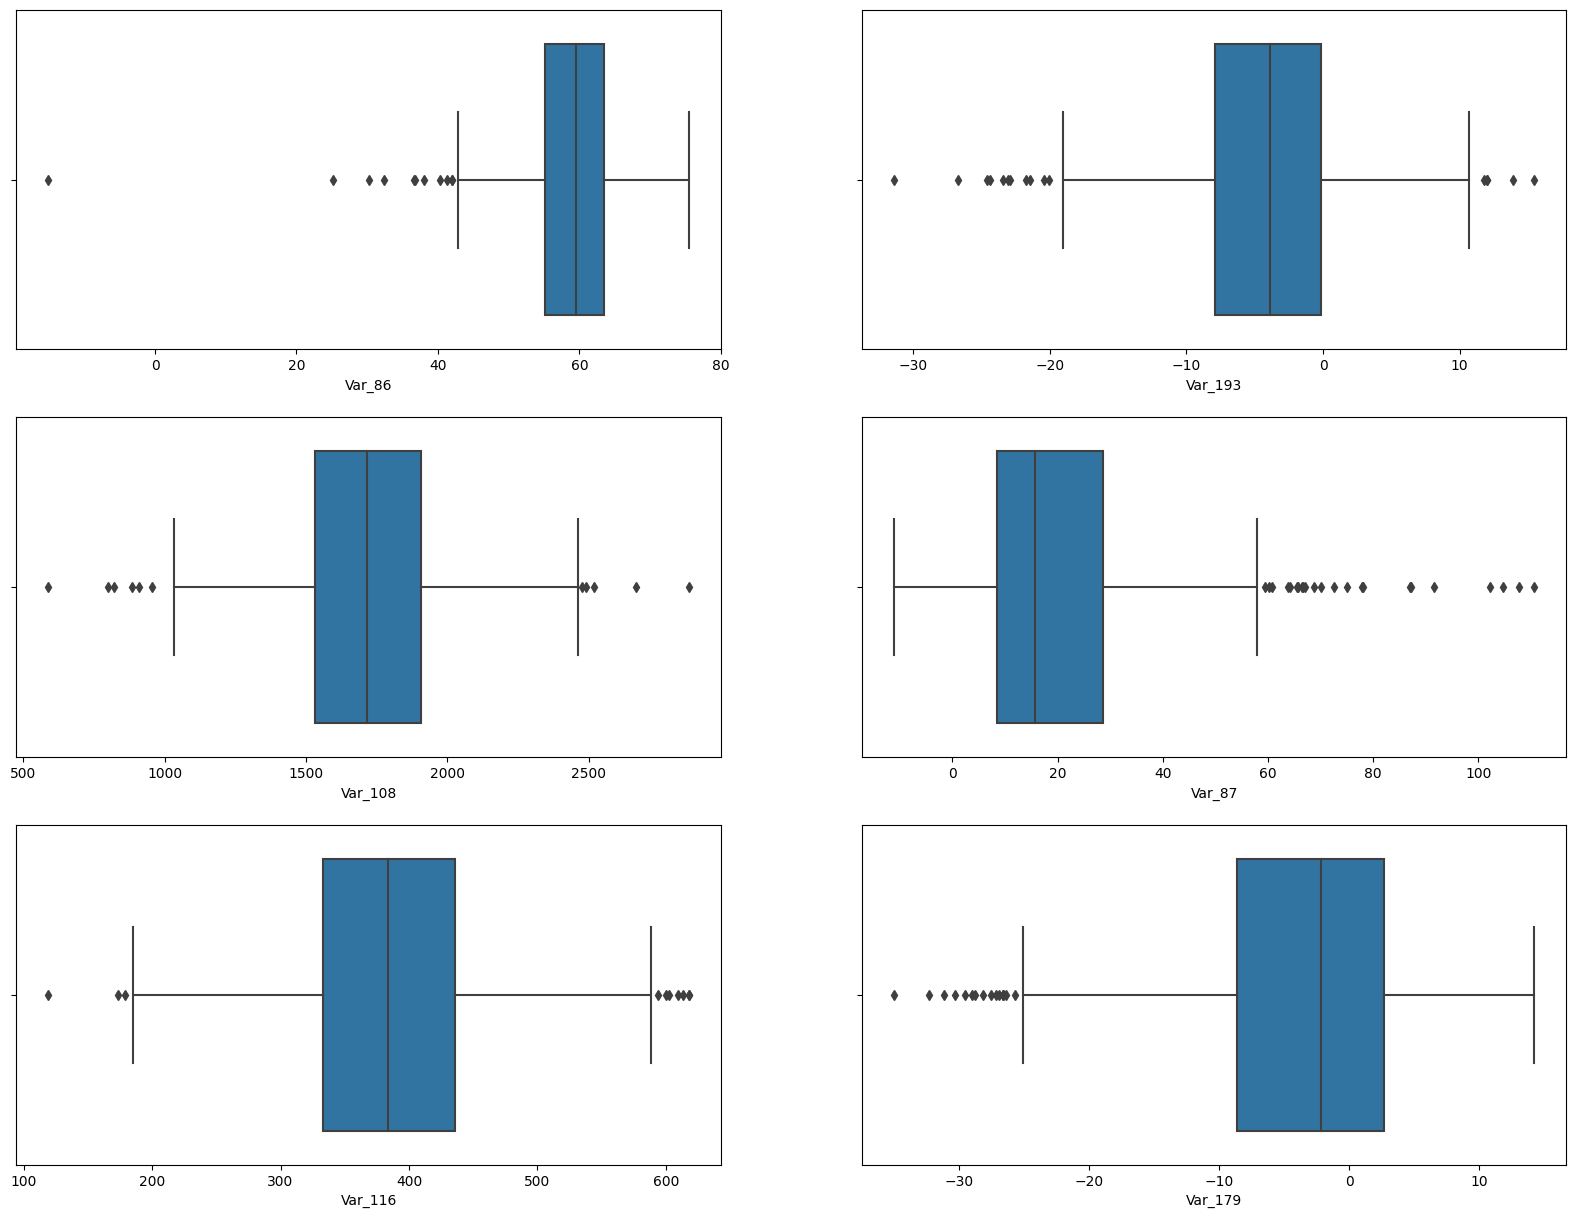

In [17]:
fig_var, ax_var = plt.subplots(3,2,figsize=(20,15))
sns.boxplot(data, x="Var_86", ax=ax_var[0][0])
sns.boxplot(data, x="Var_193", ax=ax_var[0][1])
sns.boxplot(data, x="Var_108", ax=ax_var[1][0])
sns.boxplot(data, x="Var_87", ax=ax_var[1][1])
sns.boxplot(data, x="Var_116", ax=ax_var[2][0])
sns.boxplot(data, x="Var_179", ax=ax_var[2][1])
plt.show()

In [18]:
data = data.drop(data['Var_86'].idxmin()).reset_index(drop=True)

<Axes: xlabel='Var_86'>

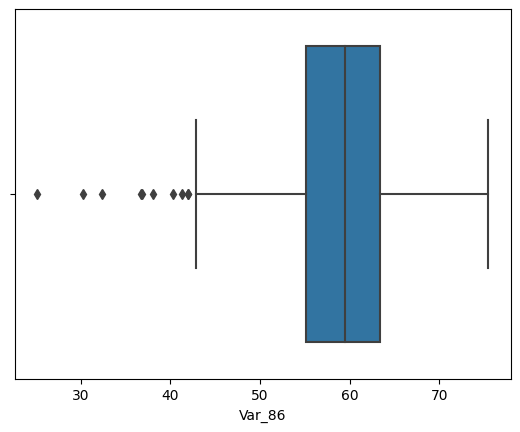

In [19]:
sns.boxplot(data, x="Var_86")

#### Plotting a regression fit between selected Variables and Velocity

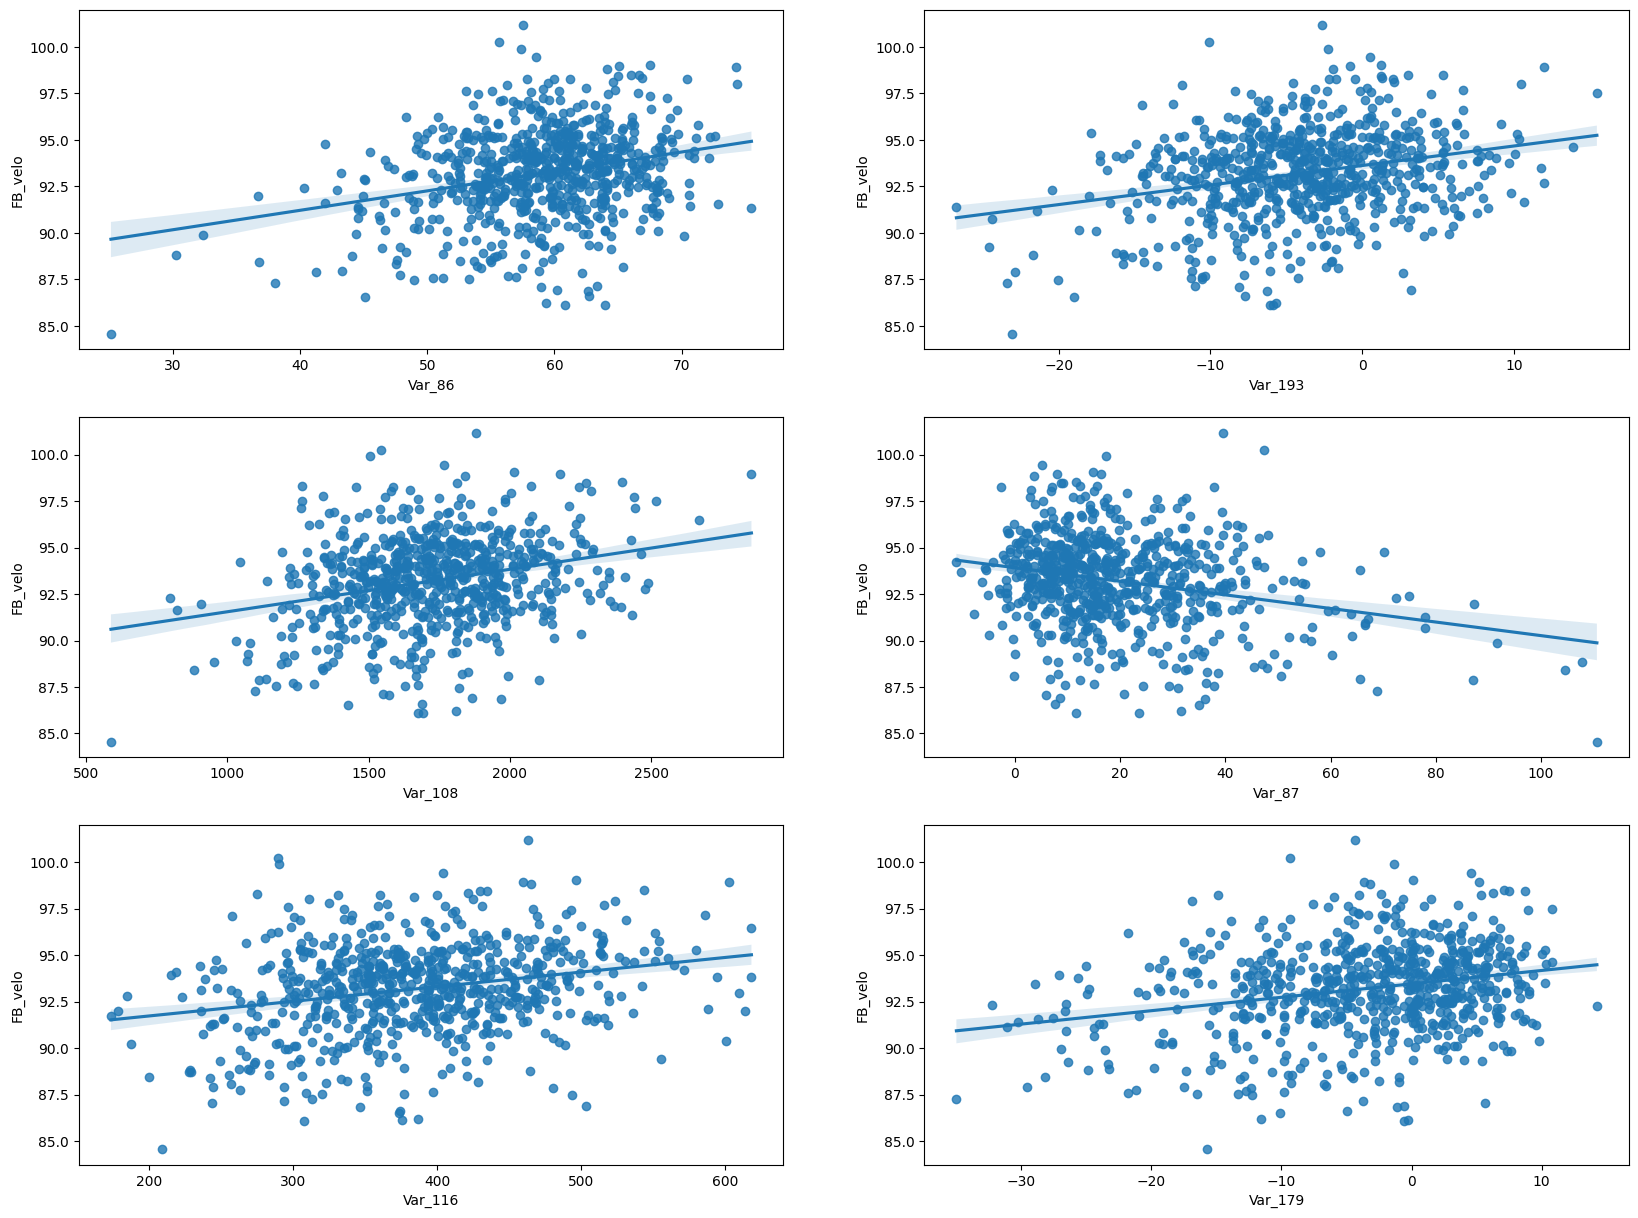

In [20]:
fig_corr, ax_corr = plt.subplots(3,2,figsize=(20,15))
sns.regplot(data, y="FB_velo", x="Var_86", ax=ax_corr[0][0])
sns.regplot(data, y="FB_velo", x="Var_193", ax=ax_corr[0][1])
sns.regplot(data, y="FB_velo", x="Var_108", ax=ax_corr[1][0])
sns.regplot(data, y="FB_velo", x="Var_87", ax=ax_corr[1][1])
sns.regplot(data, y="FB_velo", x="Var_116", ax=ax_corr[2][0])
sns.regplot(data, y="FB_velo", x="Var_179", ax=ax_corr[2][1])
plt.show()

Structure
- Description & Assumption
- Data Exploration
    - high correlation
    - correlated graphs and shit
- Variable Selection
    - correlation
    - lasso reg
- Lasso Regression
    - Overall Model
    - KMeans (talk abt silhouette)
        - Cluster 0 (pick pitch over high and low end)
            - summary plot
            - pick two pitches
                - pick relatively accurate, suit agenda
        - Cluster 1
            - summary plot
            - pick two pitches
- Conclusion

### Modeling Linear Regression

In [21]:
scaler = StandardScaler()

corr_data = data.loc[:,['one_hot_hand','Var_86','Var_193','Var_108','Var_87','Var_116','Var_179','FB_velo']]
X = corr_data.loc[:,['one_hot_hand', 'Var_86', 'Var_193', 'Var_108', 'Var_87', 'Var_116', 'Var_179']]
y = corr_data.loc[:,['FB_velo']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

custom_scale = ColumnTransformer(transformers=[('scale',StandardScaler(),['Var_86', 'Var_193', 'Var_108', 'Var_87', 'Var_116', 'Var_179'])], remainder='passthrough')
X_train = custom_scale.fit_transform(X_train)
X_test = custom_scale.transform(X_test)

model = LinearRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Root Mean Squared Error (RMSE): 2.0667517462182
R^2 Score: 0.16546155566342613


### Modeling XGBoost

In [22]:
param_grid = {"max_depth":    [3, 4, 5, 6],
              "n_estimators": [100, 200, 300, 400],
              "learning_rate": [0.01, 0.005, 0.001]}

model = XGBRegressor(eval_metric='rmse')
search = GridSearchCV(model, param_grid, cv=5).fit(X_train, y_train)

print(search.best_params_)
model= XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators = search.best_params_["n_estimators"],
                           max_depth = search.best_params_["max_depth"],
                           eval_metric='rmse')
model.fit(X_train, y_train)
preds = model.predict(X_test)

rmse = mean_squared_error(y_test, preds, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

{'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 400}
Root Mean Squared Error (RMSE): 2.0087753920224705


In [23]:
data_X_train = pd.DataFrame(X_train, columns=['one_hot_hand', 'Var_86', 'Var_193', 'Var_108', 'Var_87', 'Var_116', 'Var_179'])
data_X_test = pd.DataFrame(X_test, columns=['one_hot_hand', 'Var_86', 'Var_193', 'Var_108', 'Var_87', 'Var_116', 'Var_179'])

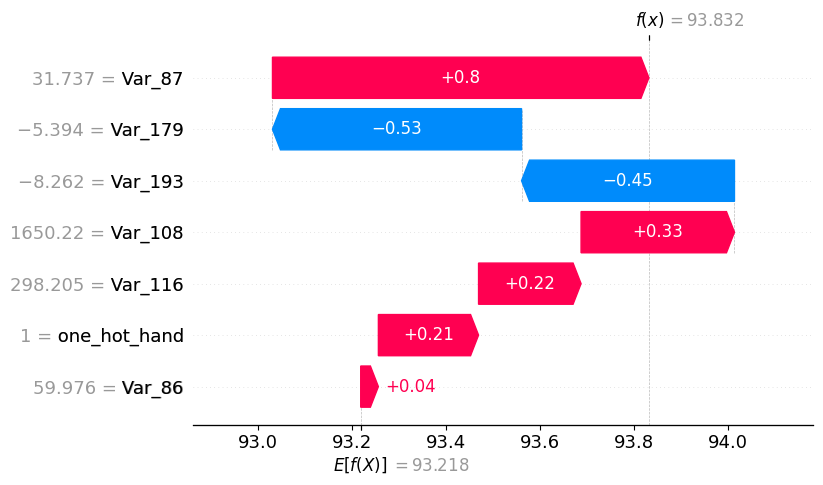

In [24]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X)
shap.plots.waterfall(shap_values[1,:])

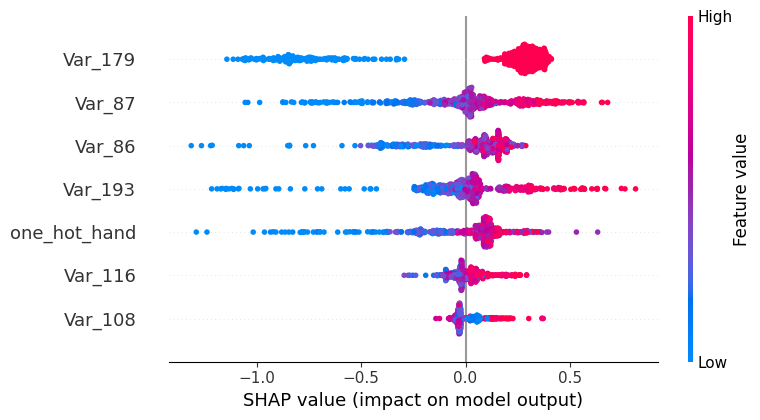

In [25]:
scaled_shap_values = explainer(data_X_train)
shap.summary_plot(scaled_shap_values, data_X_train)

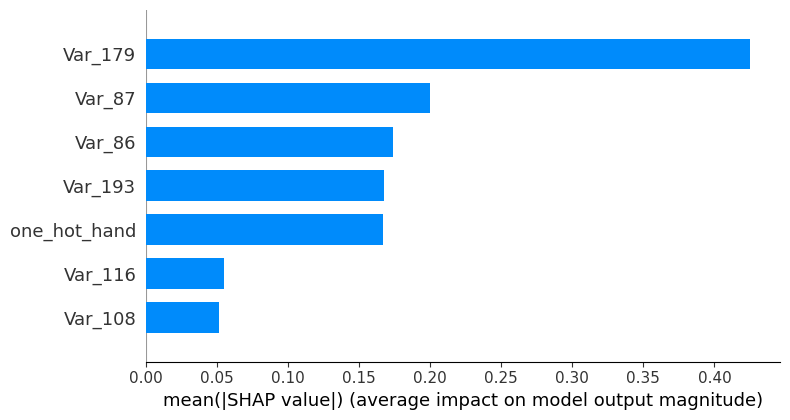

In [26]:
shap.summary_plot(scaled_shap_values, X, plot_type='bar')

#### Deciding Clusters

  File "c:\users\siddh\appdata\local\programs\python\python38\lib\site-packages\joblib\externals\loky\backend\context.py", line 251, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\users\siddh\appdata\local\programs\python\python38\lib\subprocess.py", line 489, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\users\siddh\appdata\local\programs\python\python38\lib\subprocess.py", line 854, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\users\siddh\appdata\local\programs\python\python38\lib\subprocess.py", line 1307, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


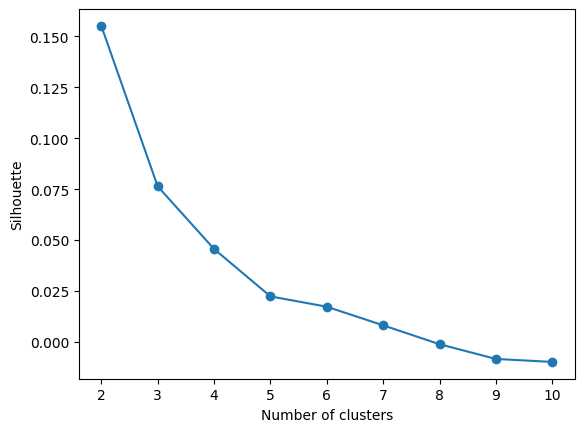

In [27]:
# silhouette method to determine clusters
scaler_all = StandardScaler()
scaled_data = scaler_all.fit_transform(X)
sil = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    labels = km.labels_
    sil.append(silhouette_score(scaled_data, labels, metric = 'euclidean'))

plt.plot(range(2, 11), sil, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')
plt.show()

In [28]:
km = KMeans(n_clusters=2, random_state=0)
corr_data['cluster'] = km.fit_predict(X)
corr_data

one_hot_hand     Var_86    Var_193      Var_108     Var_87     Var_116  \
0               1  59.363906  -5.697972  1808.513998  31.589261  386.888376   
1               1  59.976120  -8.261708  1650.220239  31.736872  298.204987   
2               1  63.505457   5.309959  2351.867813   0.868460  490.076132   
3               1  66.771034   5.421607  2307.718016   5.248450  593.837869   
4               1  55.855973  -4.922260  1211.358879  20.609722  270.130064   
..            ...        ...        ...          ...        ...         ...   
705             1  60.342537  -2.324668  1676.083400  27.095266  405.085220   
706             0  60.448388  -4.288447  1861.251515  11.117801  518.727383   
707             1  53.953030  -3.831351  1721.456654  40.391474  510.619199   
708             1  68.519821   7.669963  1723.958687  13.246426  344.750338   
709             1  51.845638 -13.610440  1632.616406  46.052551  428.183240   

       Var_179   FB_velo  cluster  
0   -11.558211  86.21085        0  
1    -5.394268  89.10082        1  
2    -6.293901  93.67752        0  
3    -0.145468  93.80372        0  
4   -15.529323  88.84100        1  
..         ...       ...      ...  
705   0.968710  97.61961        1  
706   1.739856  91.23993        0  
707   3.745494  96.20190        0  
708   5.650109  93.85143        1  
709 -18.504496  94.07224        1  

[710 rows x 9 columns]

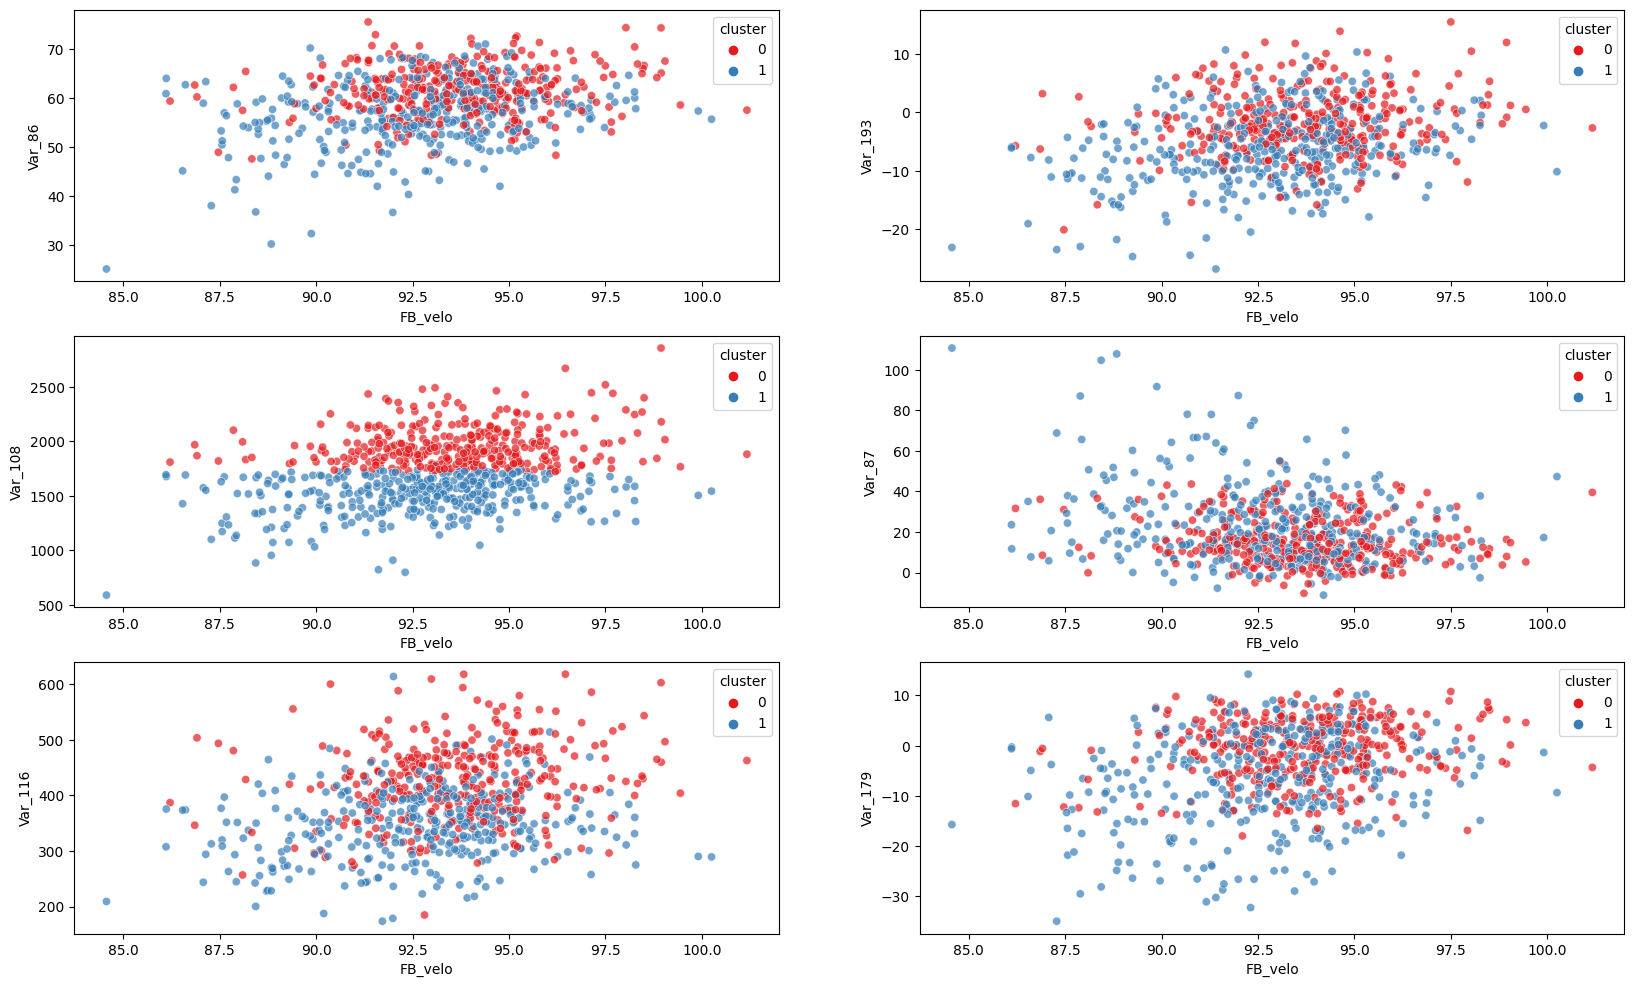

In [29]:
fig_cluster, ax_cluster = plt.subplots(3,2, figsize=(20, 12))
sns.scatterplot(data=corr_data, y='Var_86', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_cluster[0][0])
sns.scatterplot(data=corr_data, y='Var_193', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_cluster[0][1])
sns.scatterplot(data=corr_data, y='Var_108', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_cluster[1][0])
sns.scatterplot(data=corr_data, y='Var_87', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_cluster[1][1])
sns.scatterplot(data=corr_data, y='Var_116', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_cluster[2][0])
sns.scatterplot(data=corr_data, y='Var_179', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_cluster[2][1])
plt.show()

<Axes: xlabel='FB_velo', ylabel='one_hot_hand'>

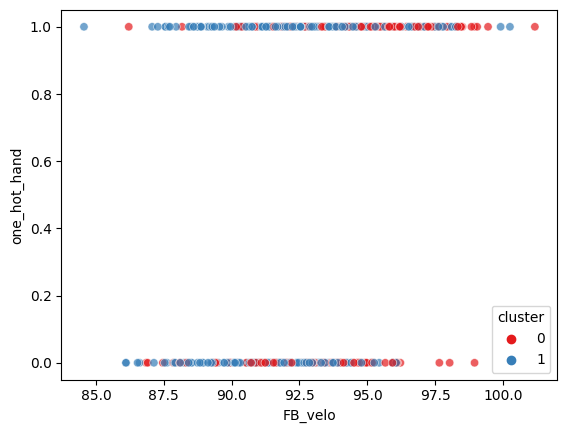

In [30]:
sns.scatterplot(data=corr_data, y='one_hot_hand', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7)

In [31]:
corr_data_0 = corr_data[corr_data['cluster']==0].drop(['cluster'], axis=1)
corr_data_1 = corr_data[corr_data['cluster']==1].drop(['cluster'], axis=1)

In [32]:
X_0 = corr_data_0.loc[:,['one_hot_hand', 'Var_86', 'Var_193', 'Var_108', 'Var_87', 'Var_116', 'Var_179']]
y_0 = corr_data_0.loc[:,['FB_velo']].values

X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size=0.15, random_state=42)
X_train_0 = custom_scale.fit_transform(X_train_0)
X_test_0 = custom_scale.transform(X_test_0)

param_grid = {"max_depth":    [3, 4, 5, 6],
              "n_estimators": [100, 200, 300, 400],
              "learning_rate": [0.01, 0.005, 0.001]}

model_0 = XGBRegressor(eval_metric='rmse')
search_0 = GridSearchCV(model_0, param_grid, cv=5).fit(X_train_0, y_train_0)

print(search_0.best_params_)
model_0= XGBRegressor(learning_rate = search_0.best_params_["learning_rate"],
                           n_estimators  = search_0.best_params_["n_estimators"],
                           max_depth     = search_0.best_params_["max_depth"],
                           eval_metric='rmse')
model_0.fit(X_train_0, y_train_0)
preds = model_0.predict(X_test_0)

rmse = mean_squared_error(y_test_0, preds, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

{'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 200}
Root Mean Squared Error (RMSE): 1.848164068096996


In [33]:
data_X_train_0 = pd.DataFrame(X_train_0, columns=['one_hot_hand', 'Var_86', 'Var_193', 'Var_108', 'Var_87', 'Var_116', 'Var_179'])
data_X_test_0 = pd.DataFrame(X_test_0, columns=['one_hot_hand', 'Var_86', 'Var_193', 'Var_108', 'Var_87', 'Var_116', 'Var_179'])

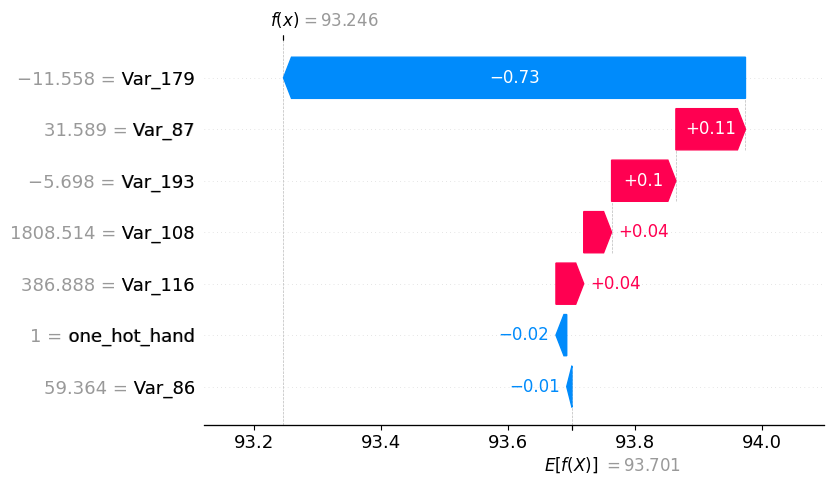

In [34]:
explainer = shap.TreeExplainer(model_0)
shap_values = explainer(X_0)
shap.plots.waterfall(shap_values[0,:])

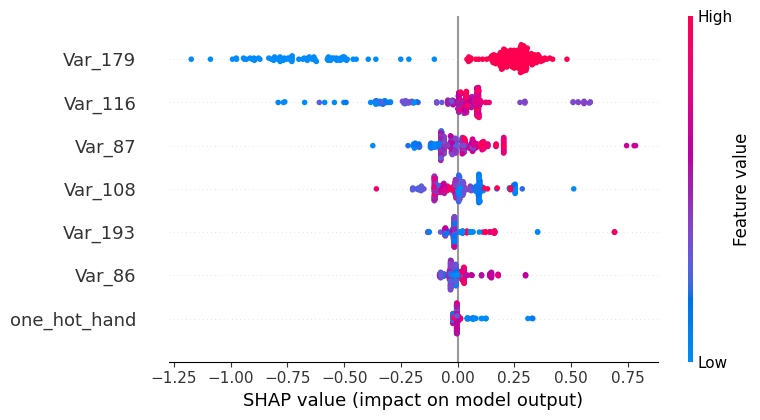

In [35]:
scaled_shap_values = explainer(data_X_train_0)
shap.summary_plot(scaled_shap_values, data_X_train_0)

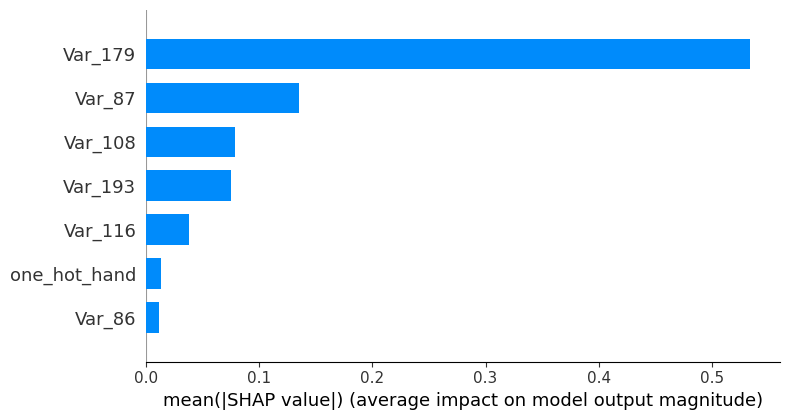

In [36]:
shap.summary_plot(shap_values, data_X_train_0, plot_type='bar')

In [37]:
X_1 = corr_data_1.loc[:,['one_hot_hand', 'Var_86', 'Var_193', 'Var_108', 'Var_87', 'Var_116', 'Var_179']]
y_1 = corr_data_1.loc[:,['FB_velo']].values

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.15, random_state=42)
X_train_1 = custom_scale.fit_transform(X_train_1)
X_test_1 = custom_scale.transform(X_test_1)

param_grid = {"max_depth":    [3, 4, 5, 6],
              "n_estimators": [100, 200, 300, 400],
              "learning_rate": [0.01, 0.005, 0.001]}

model_1 = XGBRegressor(eval_metric='rmse')
search_1 = GridSearchCV(model_1, param_grid, cv=5).fit(X_train_1, y_train_1)

print(search_1.best_params_)
model_1= XGBRegressor(learning_rate = search_1.best_params_["learning_rate"],
                           n_estimators = search_1.best_params_["n_estimators"],
                           max_depth = search_1.best_params_["max_depth"],
                           eval_metric='rmse')
model_1.fit(X_train_1, y_train_1)
preds = model_1.predict(X_test_1)

rmse = mean_squared_error(y_test_1, preds, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

{'learning_rate': 0.005, 'max_depth': 4, 'n_estimators': 300}
Root Mean Squared Error (RMSE): 2.2555895379999504


In [38]:
data_X_train_1 = pd.DataFrame(X_train_1, columns=['one_hot_hand', 'Var_86', 'Var_193', 'Var_108', 'Var_87', 'Var_116', 'Var_179'])
data_X_test_1 = pd.DataFrame(X_test_1, columns=['one_hot_hand', 'Var_86', 'Var_193', 'Var_108', 'Var_87', 'Var_116', 'Var_179'])

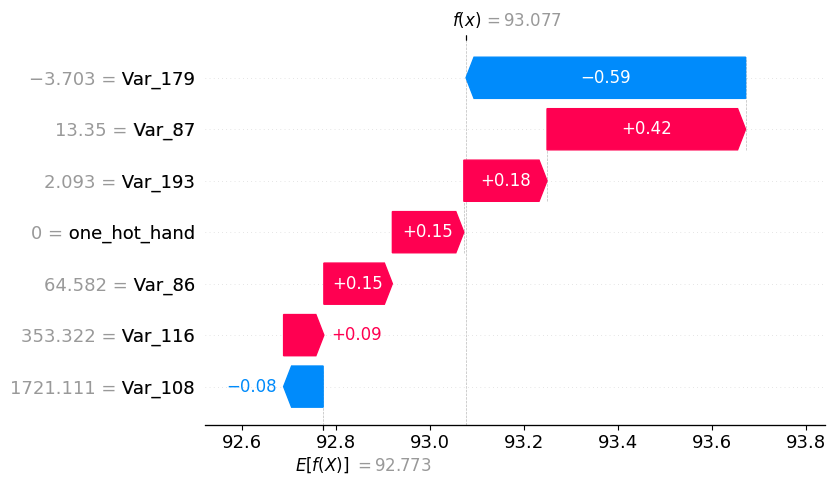

In [39]:
explainer = shap.TreeExplainer(model_1)
shap_values = explainer(X_1)
shap.plots.waterfall(shap_values[30,:])

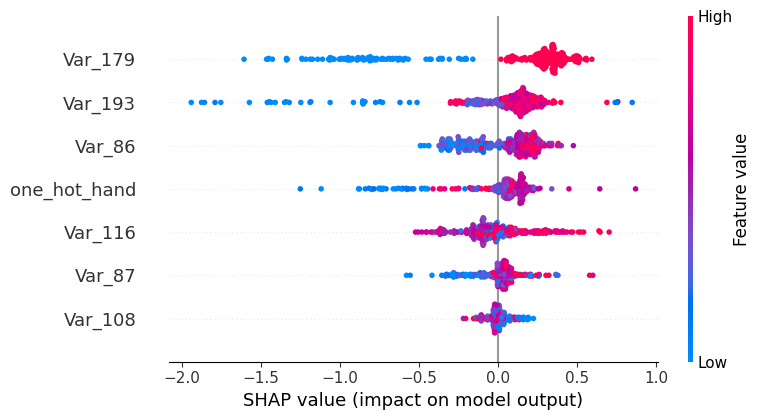

In [40]:
scaled_shap_values = explainer(data_X_train_1)
shap.summary_plot(scaled_shap_values, data_X_train_1)

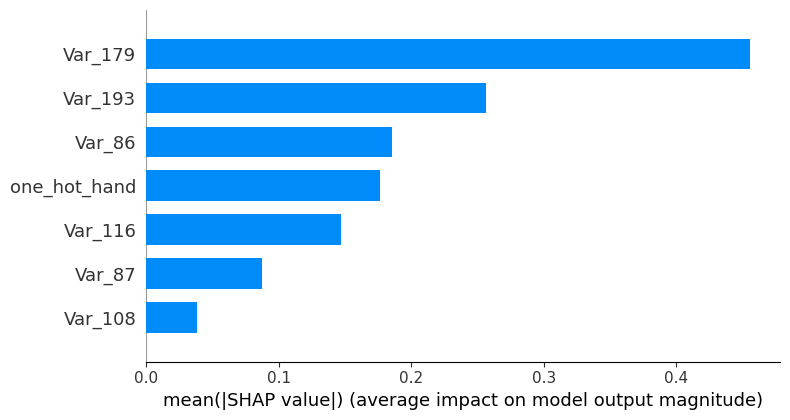

In [41]:
shap.summary_plot(scaled_shap_values, data_X_train_1, plot_type='bar')

### Feature Selection using Lasso

In [42]:
X = data.drop(['player_id', 'FB_velo'], axis=1)
y = data['FB_velo']

X_scaled = scaler.fit_transform(X)

lasso = Lasso(alpha=0.3)
lasso.fit(X_scaled, y)

significant_features = X.columns[lasso.coef_ != 0]
significant_features

Index(['Var_7', 'Var_38', 'Var_59', 'Var_70', 'Var_86', 'Var_101', 'Var_107',
       'Var_116', 'Var_126', 'Var_148', 'Var_181', 'Var_223', 'Var_225',
       'one_hot_hand'],
      dtype='object')

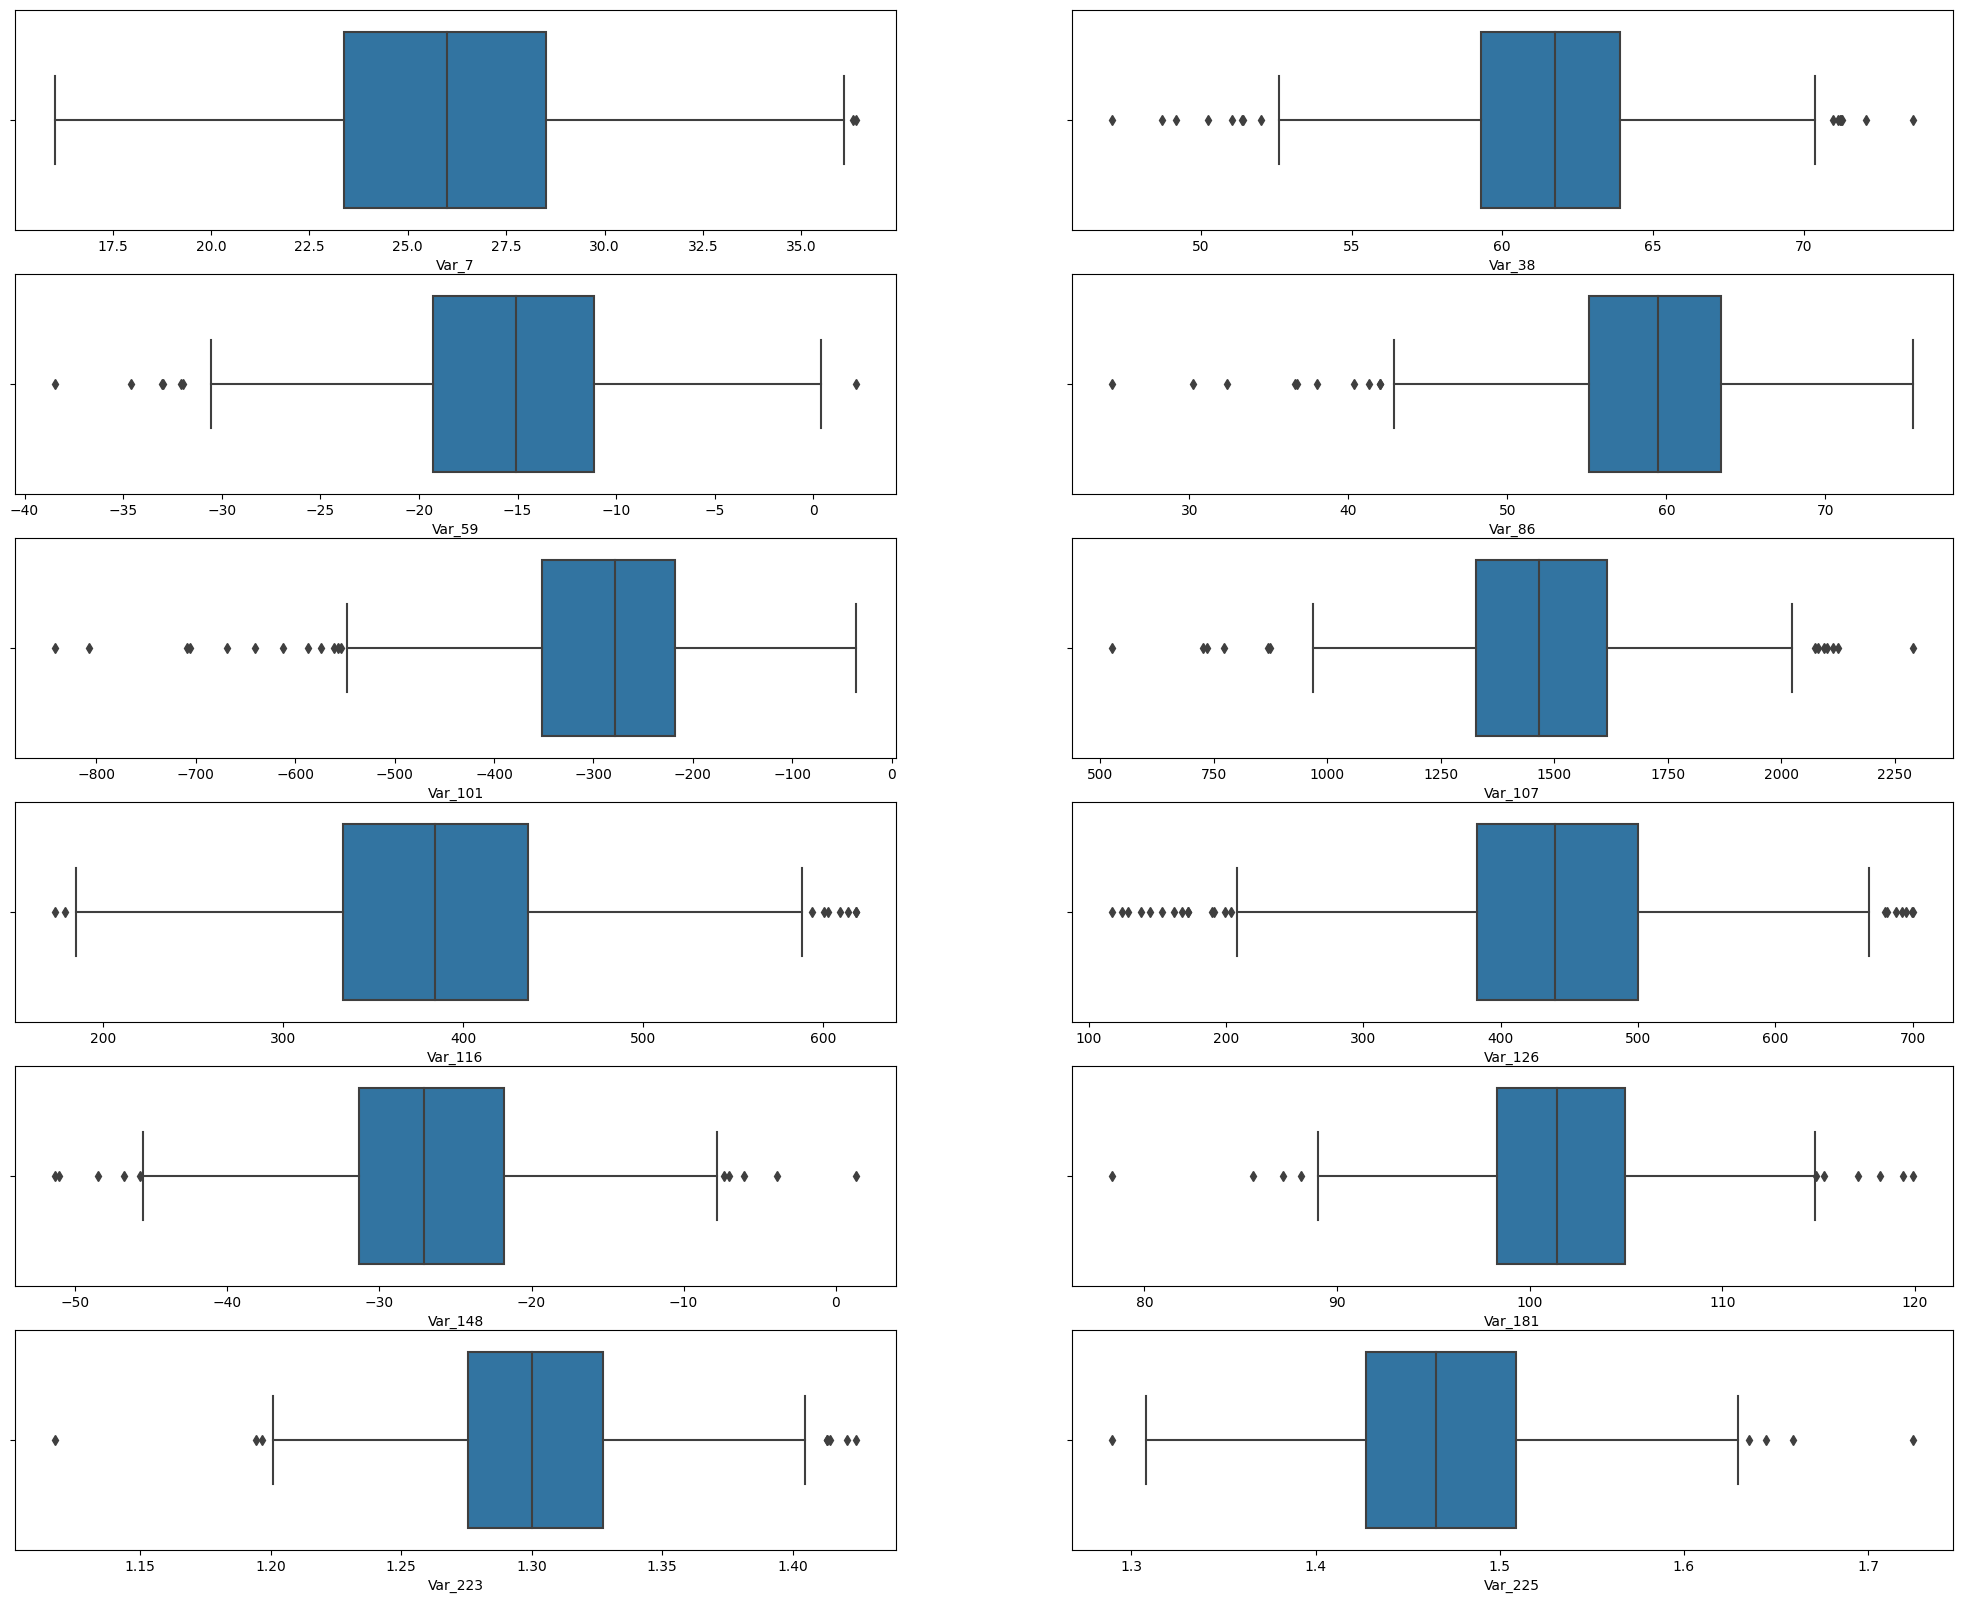

In [43]:
fig_lasso, ax_lasso = plt.subplots(6,2,figsize=(25,20))
sns.boxplot(data, x="Var_7", ax=ax_lasso[0][0])
sns.boxplot(data, x="Var_38", ax=ax_lasso[0][1])
sns.boxplot(data, x="Var_59", ax=ax_lasso[1][0])
sns.boxplot(data, x="Var_86", ax=ax_lasso[1][1])
sns.boxplot(data, x="Var_101", ax=ax_lasso[2][0])
sns.boxplot(data, x="Var_107", ax=ax_lasso[2][1])
sns.boxplot(data, x="Var_116", ax=ax_lasso[3][0])
sns.boxplot(data, x="Var_126", ax=ax_lasso[3][1])
sns.boxplot(data, x="Var_148", ax=ax_lasso[4][0])
sns.boxplot(data, x="Var_181", ax=ax_lasso[4][1])
sns.boxplot(data, x="Var_223", ax=ax_lasso[5][0])
sns.boxplot(data, x="Var_225", ax=ax_lasso[5][1])
plt.show()

In [44]:
data = data.drop(data['Var_107'].idxmin()).reset_index(drop=True)
data = data.drop(data['Var_181'].idxmin()).reset_index(drop=True)
data = data.drop(data['Var_223'].idxmin()).reset_index(drop=True)
data = data.drop(data['Var_225'].idxmin()).reset_index(drop=True)

<Axes: xlabel='Var_225'>

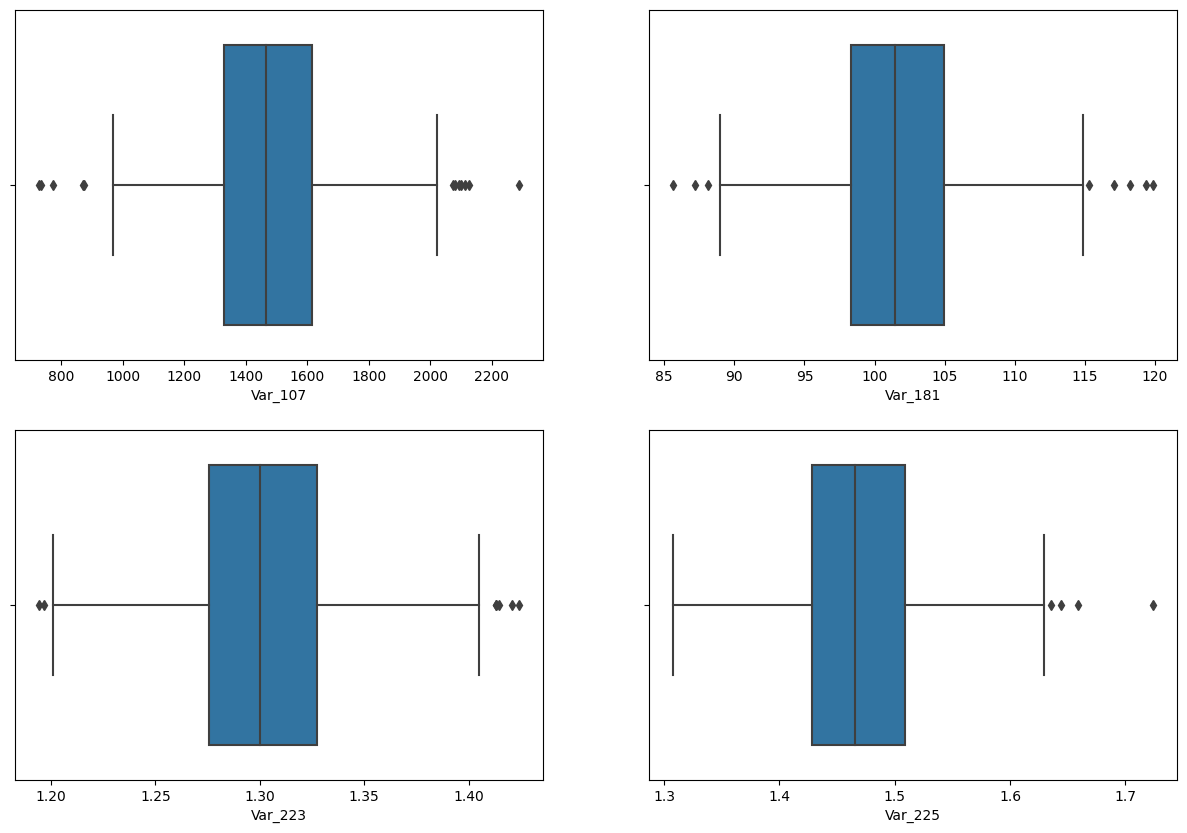

In [45]:
fig_lasso_after, ax_lasso_after = plt.subplots(2,2,figsize=(15,10))

sns.boxplot(data, x="Var_107", ax=ax_lasso_after[0][0])
sns.boxplot(data, x="Var_181", ax=ax_lasso_after[0][1])
sns.boxplot(data, x="Var_223", ax=ax_lasso_after[1][0])
sns.boxplot(data, x="Var_225", ax=ax_lasso_after[1][1])

In [46]:
lasso_data = data[['Var_7', 'Var_38', 'Var_59', 'Var_70', 'Var_86', 'Var_101', 'Var_107',
       'Var_116', 'Var_126', 'Var_148', 'Var_181', 'Var_223', 'Var_225',
       'one_hot_hand','FB_velo']]
X = lasso_data[['Var_7', 'Var_38', 'Var_59', 'Var_86', 'Var_101', 'Var_107',
       'Var_116', 'Var_126', 'Var_148', 'Var_181', 'Var_223', 'Var_225',
       'one_hot_hand']]
y = data['FB_velo']

custom_scale = ColumnTransformer(transformers=[('scale',StandardScaler(),['Var_7', 'Var_38', 'Var_59', 'Var_86', 'Var_101', 'Var_107',
       'Var_116', 'Var_126', 'Var_148', 'Var_181', 'Var_223', 'Var_225'])], remainder='passthrough')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train = custom_scale.fit_transform(X_train)
X_test = custom_scale.transform(X_test)

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Root Mean Squared Error (RMSE): 1.723594169048294
R^2 Score: 0.41342304336691893


In [47]:
high_corr_pairs(lasso_data,0.7) # remove Var_70 as highly correlated with Var_86

[('Var_86', 'Var_70', 0.8448179306432048)]

In [48]:
param_grid = {"max_depth":    [3, 4, 5, 6],
              "n_estimators": [100, 200, 300, 400],
              "learning_rate": [0.01, 0.005, 0.001]}

model = XGBRegressor(eval_metric='rmse')
search = GridSearchCV(model, param_grid, cv=5).fit(X_train, y_train)

print(search.best_params_)
model= XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='rmse')
model.fit(X_train, y_train)
preds = model.predict(X_test)

rmse = mean_squared_error(y_test, preds, squared=False)

print(f"Root Mean Squared Error (RMSE): {rmse}")

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400}
Root Mean Squared Error (RMSE): 1.868131998094306


In [49]:
data_X_train = pd.DataFrame(X_train, columns=['Var_7', 'Var_38', 'Var_59', 'Var_86', 'Var_101', 
                                              'Var_107', 'Var_116', 'Var_126', 'Var_148', 'Var_181', 
                                              'Var_223', 'Var_225', 'one_hot_hand'])
data_X_test = pd.DataFrame(X_test, columns=['Var_7', 'Var_38', 'Var_59', 'Var_86', 'Var_101', 
                                              'Var_107', 'Var_116', 'Var_126', 'Var_148', 'Var_181', 
                                              'Var_223', 'Var_225', 'one_hot_hand'])

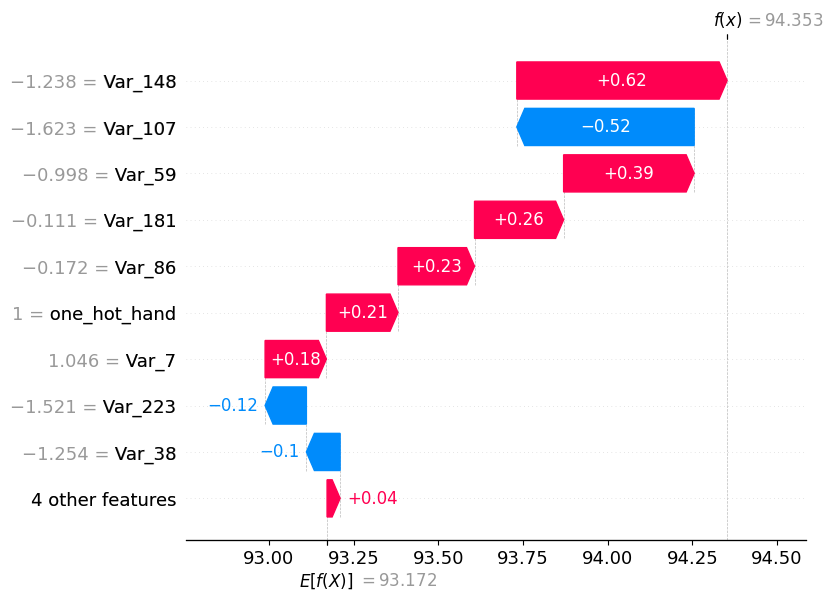

In [50]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(data_X_train)
shap.plots.waterfall(shap_values[0,:])

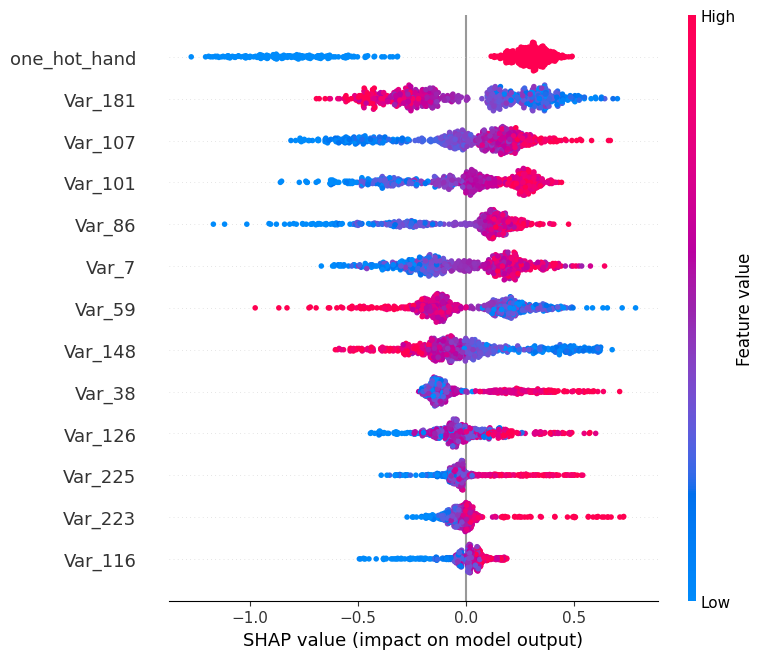

In [51]:
scaled_shap_values = explainer(data_X_train)
shap.summary_plot(scaled_shap_values, data_X_train)

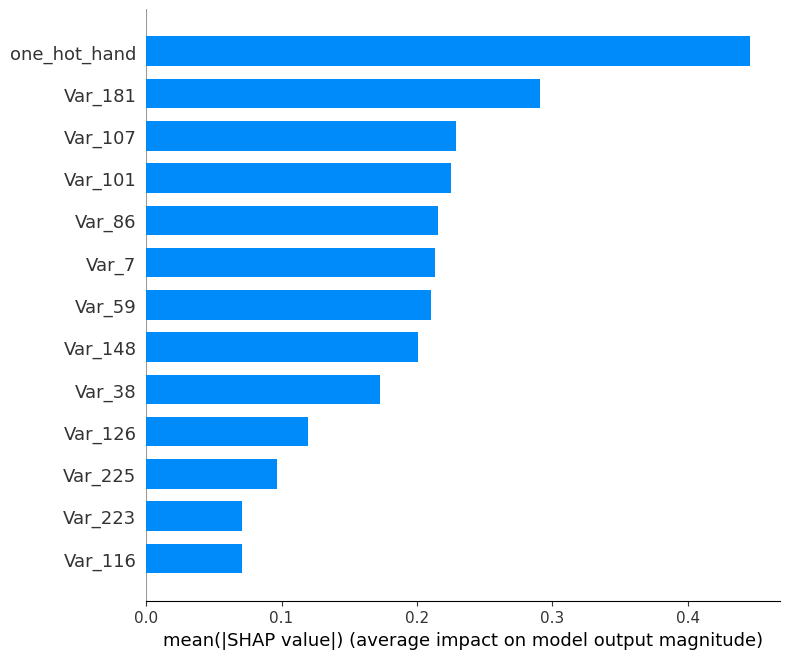

In [52]:
shap.summary_plot(shap_values, X, plot_type='bar')

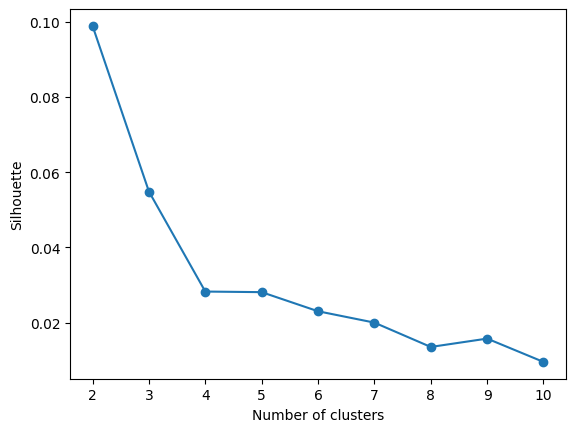

In [53]:
X_scaled = custom_scale.fit_transform(X)
sil = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    labels = km.labels_
    sil.append(silhouette_score(X_scaled, labels, metric = 'euclidean'))

plt.plot(range(2, 11), sil, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')
plt.show()

km = KMeans(n_clusters=2, random_state=0)
lasso_data['cluster'] = km.fit_predict(X)

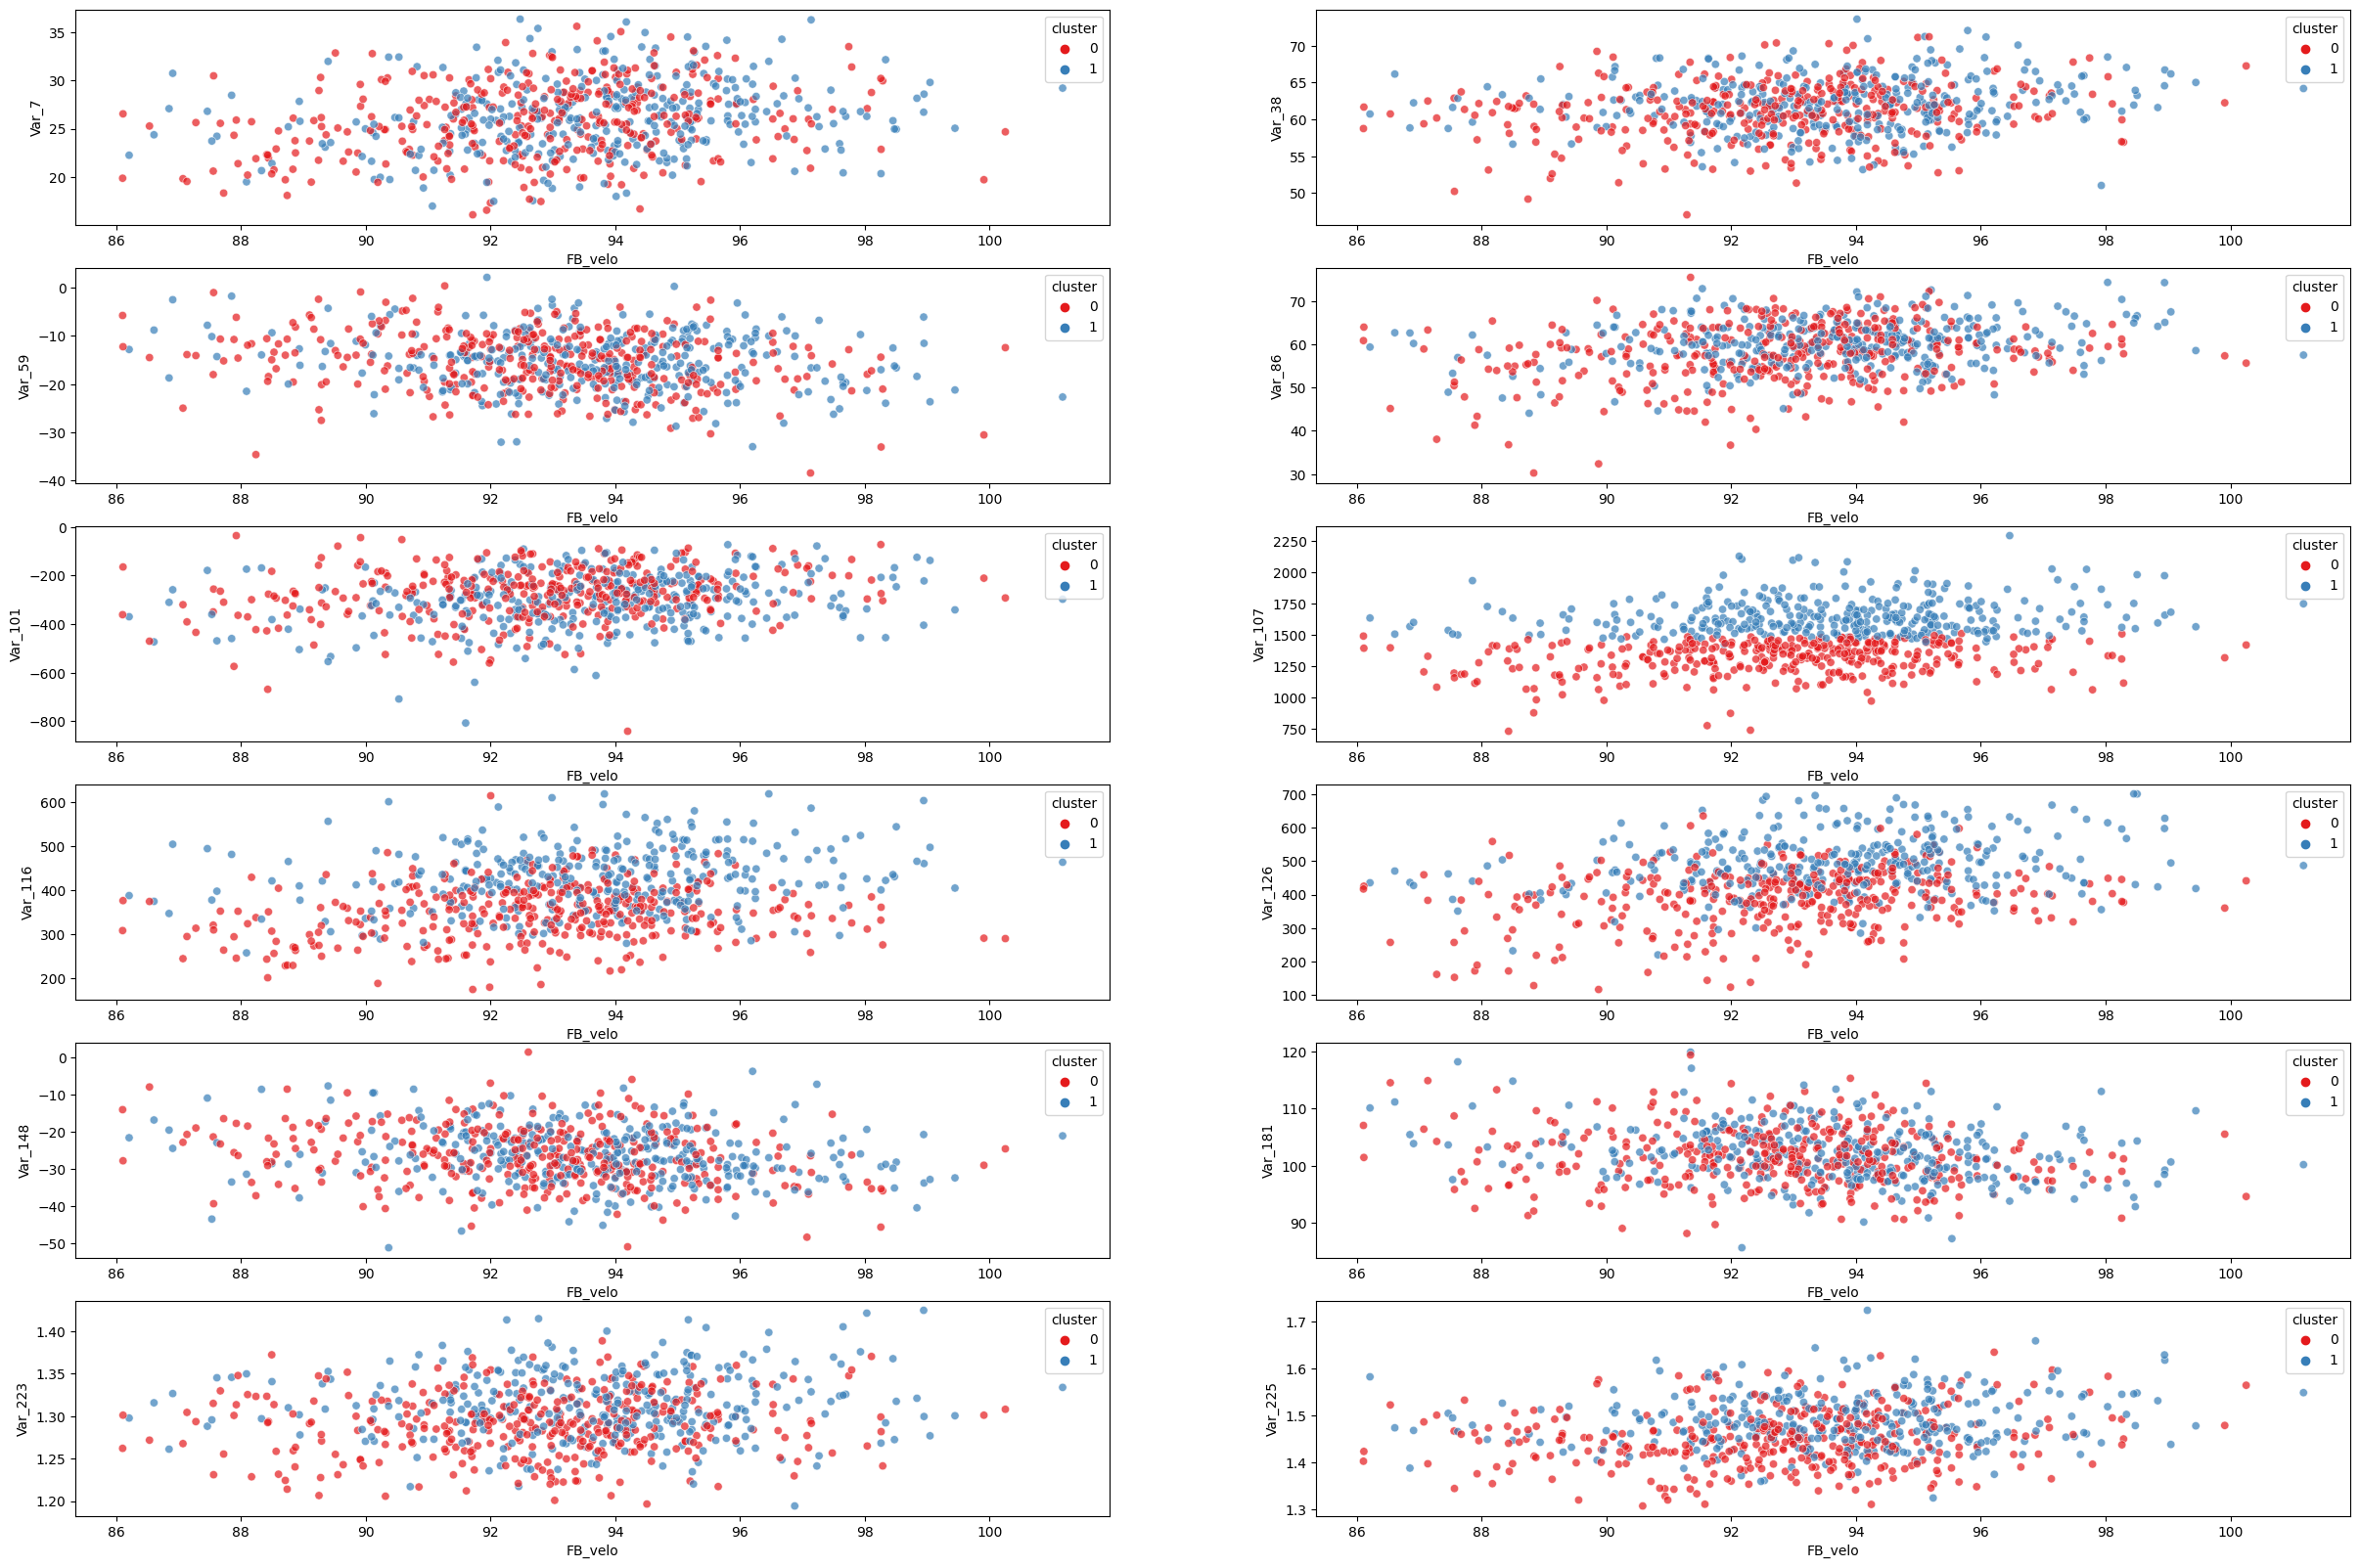

In [54]:
fig_lasso_cluster, ax_lasso_cluster = plt.subplots(6,2, figsize=(30, 20))
sns.scatterplot(data=lasso_data, y='Var_7', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_lasso_cluster[0][0])
sns.scatterplot(data=lasso_data, y='Var_38', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_lasso_cluster[0][1])
sns.scatterplot(data=lasso_data, y='Var_59', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_lasso_cluster[1][0])
sns.scatterplot(data=lasso_data, y='Var_86', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_lasso_cluster[1][1])
sns.scatterplot(data=lasso_data, y='Var_101', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_lasso_cluster[2][0])
sns.scatterplot(data=lasso_data, y='Var_107', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_lasso_cluster[2][1])
sns.scatterplot(data=lasso_data, y='Var_116', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_lasso_cluster[3][0])
sns.scatterplot(data=lasso_data, y='Var_126', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_lasso_cluster[3][1])
sns.scatterplot(data=lasso_data, y='Var_148', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_lasso_cluster[4][0])
sns.scatterplot(data=lasso_data, y='Var_181', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_lasso_cluster[4][1])
sns.scatterplot(data=lasso_data, y='Var_223', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_lasso_cluster[5][0])
sns.scatterplot(data=lasso_data, y='Var_225', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_lasso_cluster[5][1])
plt.show()

In [55]:
lasso_data_0 = lasso_data[lasso_data['cluster']==0].drop(['cluster'], axis=1)
lasso_data_1 = lasso_data[lasso_data['cluster']==1].drop(['cluster'], axis=1)

In [56]:
lasso_data_0['FB_velo'].describe()

count    361.000000
mean      92.799527
std        2.405438
min       86.106330
25%       91.348220
50%       92.975160
75%       94.300980
max      100.252200
Name: FB_velo, dtype: float64

In [57]:
lasso_data_1['FB_velo'].describe()

count    345.000000
mean      93.642056
std        2.363544
min       86.210850
25%       92.210420
50%       93.840180
75%       95.146880
max      101.170400
Name: FB_velo, dtype: float64

In [58]:
X_0 = lasso_data_0.loc[:,['Var_7', 'Var_38', 'Var_59', 'Var_86', 'Var_101', 'Var_107',
                          'Var_116', 'Var_126', 'Var_148', 'Var_181',
                          'Var_223', 'Var_225', 'one_hot_hand']]
y_0 = lasso_data_0.loc[:,['FB_velo']].values

X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size=0.15, random_state=42)
X_train_0 = custom_scale.fit_transform(X_train_0)
X_test_0 = custom_scale.transform(X_test_0)

param_grid = {"max_depth":    [3, 4, 5, 6],
              "n_estimators": [100, 200, 300, 400],
              "learning_rate": [0.01, 0.005, 0.001]}

model_0 = XGBRegressor(eval_metric='rmse')
search_0 = GridSearchCV(model_0, param_grid, cv=5).fit(X_train_0, y_train_0)

print(search_0.best_params_)
model_0= XGBRegressor(learning_rate = search_0.best_params_["learning_rate"],
                           n_estimators  = search_0.best_params_["n_estimators"],
                           max_depth     = search_0.best_params_["max_depth"],
                           eval_metric='rmse')
model_0.fit(X_train_0, y_train_0)
preds = model_0.predict(X_test_0)

rmse = mean_squared_error(y_test_0, preds, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Root Mean Squared Error (RMSE): 2.3895407698620046


In [59]:
data_X_train_0 = pd.DataFrame(X_train_0, columns=['Var_7', 'Var_38', 'Var_59', 'Var_86', 'Var_101', 
                                              'Var_107', 'Var_116', 'Var_126', 'Var_148', 'Var_181', 
                                              'Var_223', 'Var_225', 'one_hot_hand'])
data_X_test_0 = pd.DataFrame(X_test_0, columns=['Var_7', 'Var_38', 'Var_59', 'Var_86', 'Var_101', 
                                              'Var_107', 'Var_116', 'Var_126', 'Var_148', 'Var_181', 
                                              'Var_223', 'Var_225', 'one_hot_hand'])

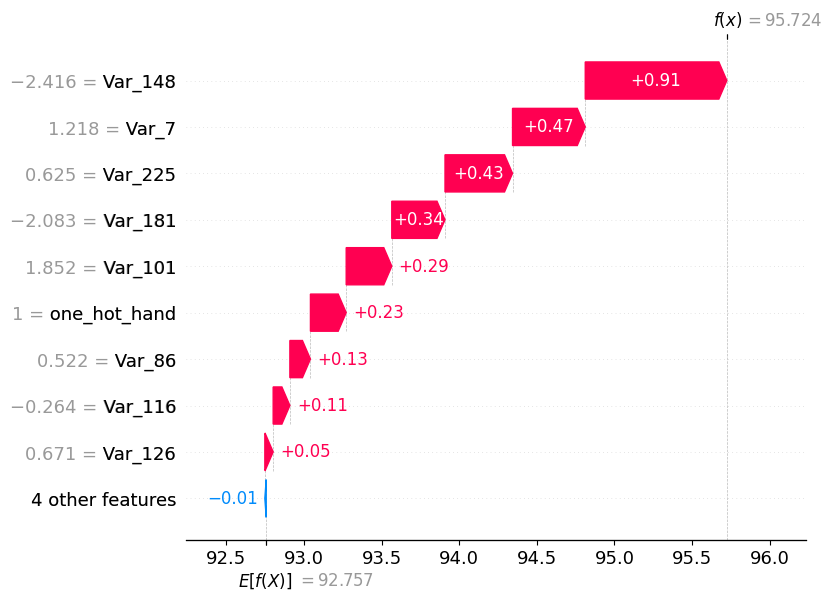

In [77]:
explainer = shap.TreeExplainer(model_0)
shap_values = explainer(data_X_train_0)
shap.plots.waterfall(shap_values[139,:])

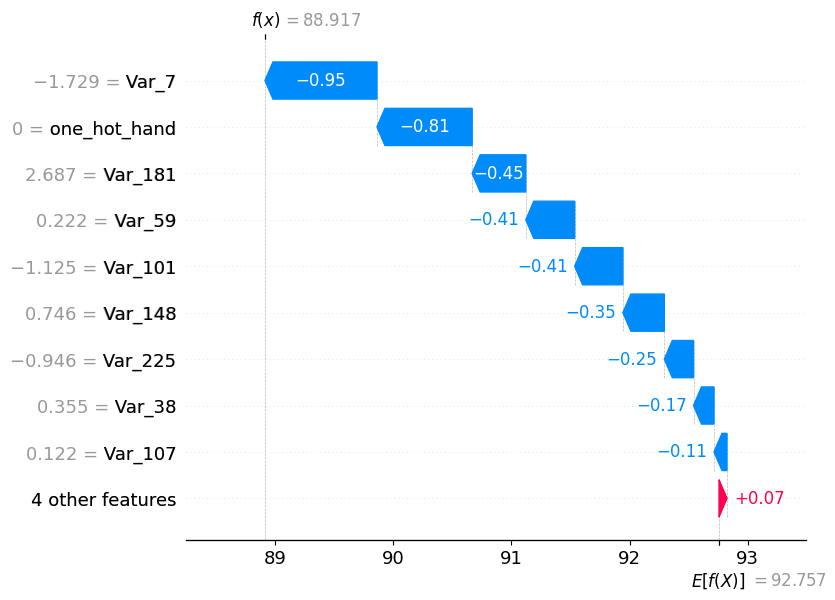

In [78]:
shap.plots.waterfall(shap_values[46,:])

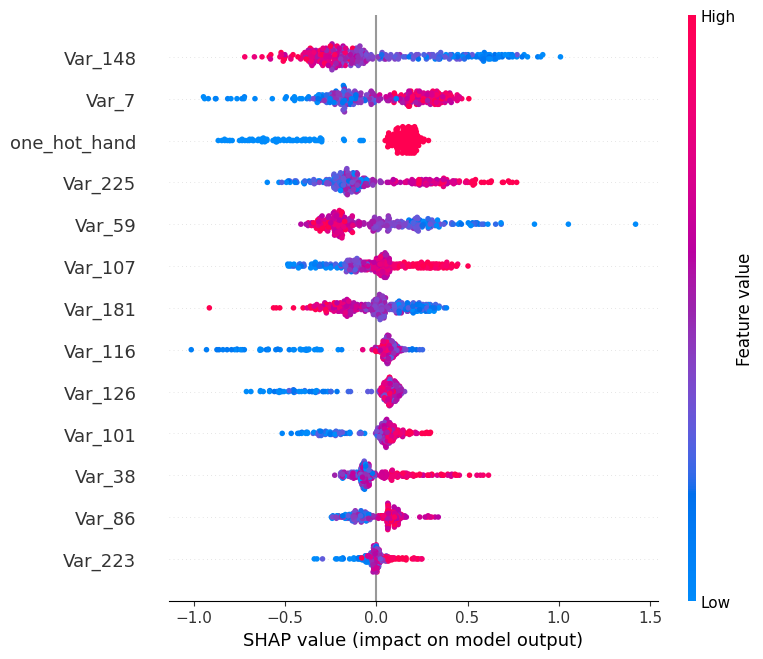

In [63]:
shap.summary_plot(shap_values, data_X_train_0)

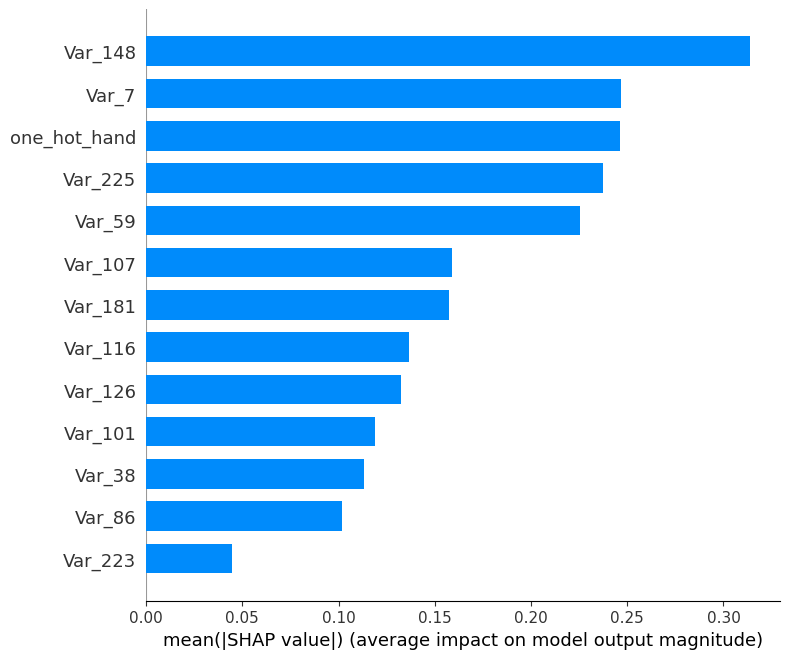

In [64]:
shap.summary_plot(shap_values, data_X_train_0, plot_type='bar')

In [65]:
X_1 = lasso_data_1.loc[:,['Var_7', 'Var_38', 'Var_59', 'Var_86', 'Var_101', 'Var_107',
                         'Var_116', 'Var_126', 'Var_148', 'Var_181', 'Var_223', 
                         'Var_225', 'one_hot_hand']]
y_1 = lasso_data_1.loc[:,['FB_velo']].values

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.15, random_state=42)
X_train_1 = custom_scale.fit_transform(X_train_1)
X_test_1 = custom_scale.transform(X_test_1)

param_grid = {"max_depth":    [3, 4, 5, 6],
              "n_estimators": [100, 200, 300, 400],
              "learning_rate": [0.01, 0.005, 0.001]}

model_1 = XGBRegressor(eval_metric='rmse')
search_1 = GridSearchCV(model_1, param_grid, cv=5).fit(X_train_1, y_train_1)

print(search_1.best_params_)
model_1= XGBRegressor(learning_rate = search_1.best_params_["learning_rate"],
                           n_estimators = search_1.best_params_["n_estimators"],
                           max_depth = search_1.best_params_["max_depth"],
                           eval_metric='rmse')
model_1.fit(X_train_1, y_train_1)
preds = model_1.predict(X_test_1)

rmse = mean_squared_error(y_test_1, preds, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400}
Root Mean Squared Error (RMSE): 2.2202135501698126


In [66]:
data_X_train_1 = pd.DataFrame(X_train_1, columns=['Var_7', 'Var_38', 'Var_59', 'Var_86', 'Var_101', 
                                              'Var_107', 'Var_116', 'Var_126', 'Var_148', 'Var_181', 
                                              'Var_223', 'Var_225', 'one_hot_hand'])
data_X_test_1 = pd.DataFrame(X_test_1, columns=['Var_7', 'Var_38', 'Var_59', 'Var_86', 'Var_101', 
                                              'Var_107', 'Var_116', 'Var_126', 'Var_148', 'Var_181', 
                                              'Var_223', 'Var_225', 'one_hot_hand'])

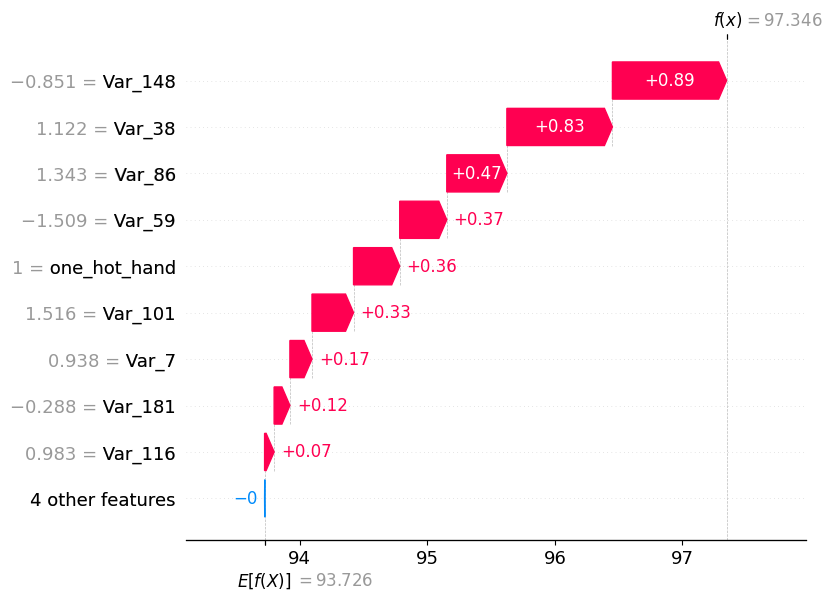

In [74]:
explainer = shap.TreeExplainer(model_1)
shap_values = explainer(data_X_train_1)
shap.plots.waterfall(shap_values[74,:])

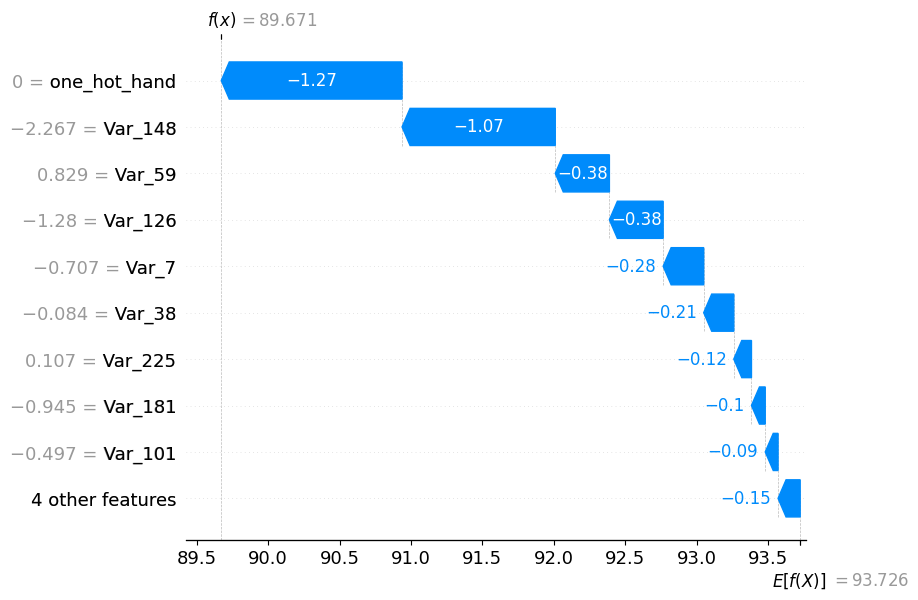

In [72]:
explainer = shap.TreeExplainer(model_1)
shap.plots.waterfall(shap_values[257,:])

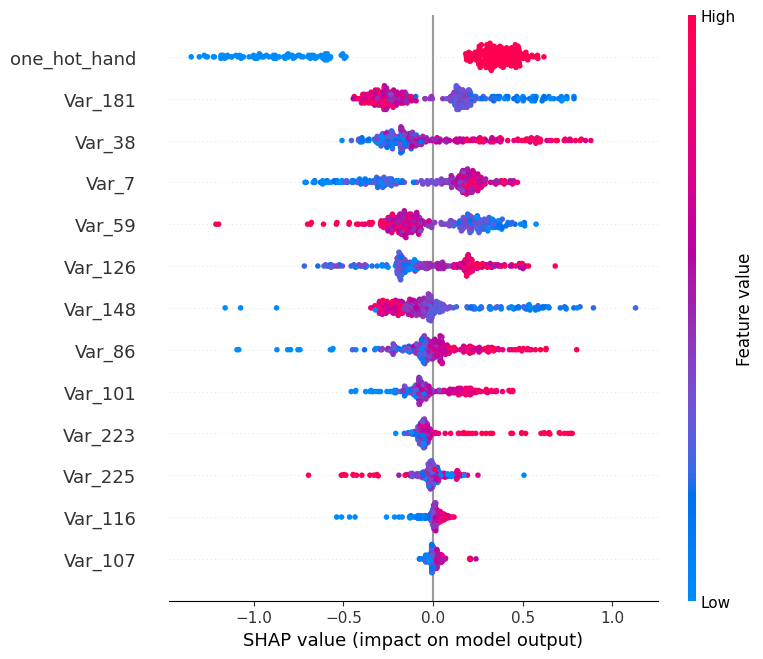

In [70]:
scaled_shap_values = explainer(data_X_train_1)
shap.summary_plot(scaled_shap_values, data_X_train_1)

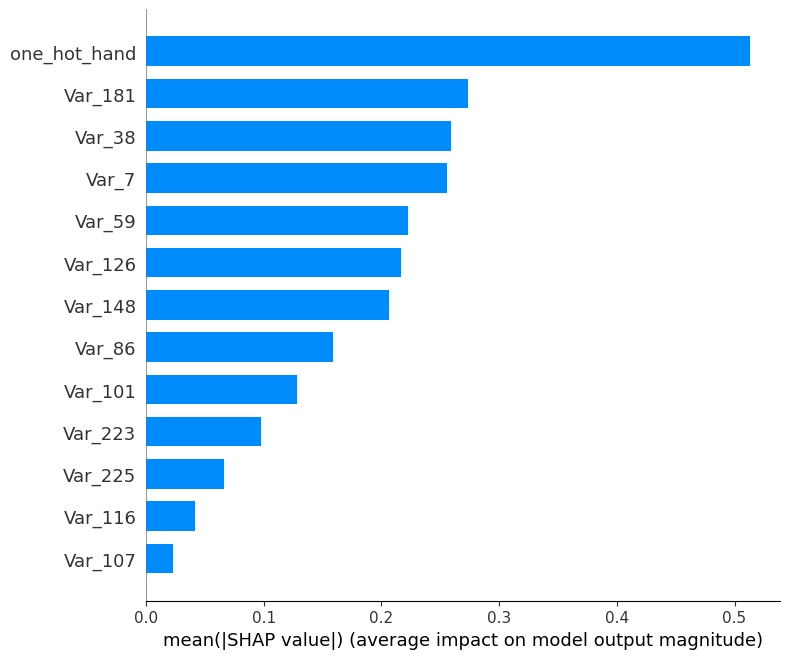

In [71]:
shap.summary_plot(shap_values, X_1, plot_type='bar')